# Problem statement:
A house value is simply more than location and square footage. Like the features that make 
up a person, an educated party would want to know all aspects that give a house its value. For 
example, you want to sell a house and you don’t know the price which you can take — it can’t 
be too low or too high. To find house price you usually try to find similar properties in your 
neighbourhood and based on gathered data you will try to assess your house price

# Objective:
Take advantage of all of the feature variables available below, use it to analyse and predict 
house prices.
1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: square footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room 
23: total_area: Measure of both living and lot

# Problem Statement

## Current Situation:

The residential real estate industry is huge, and buying or selling a home is likely the biggest transaction people will make in their lifetime.The traditional real estate system involved a broker between the buyer and the seller.For a potential buyer,the only way to negotiate with the sellers on price was to have the agent drive across town to my apartment with a contract, cross out the selling price with my counter-offer, and then have him drive to the sellers. This happened multiple times in a process designed to reinforce the central role of the agent.A lot of times the buyer is at loss as his property may be undervalued by the seller and the agent as the fixing of the price is based on intutions of people.On the contrary,the seller may be at a loss when both the agent and buyer undervalues his property.Estimating the right proice is the tedious task involving the time and expertise of a personnel who is familiar with the industry at large,thus involving money in the process.

## Opportunity for Improvement:

Humans are prone to errors because of their cognitive biases.We often may tend to give weightage to an insignificant aspect and tend to a lower weightage to an important aspect.This can prove to be crutial in such a big transaction.So,rather than relying on human intution,it would a good idea to rely on logic for the estimation of prices of properties.
Machine Learning models offer an opportunity to use data driven logic to arrive at a price.Explainablity is an important part in convincing a buyer/seller and hence data driven logic such as showing in the importance of parameters in a descision tree regressor will be important in reasoning towards how the price has been arrive.
This leaves us with a win-win situation for both the buyer and seller as the property is sold/bought at the right value.The website/agent is at a gain as repetitive task of estimation of property prices are automated,thus increasing productivity.

## Data Requirement:

We would require a huge amount of data with the details of the various parameters that seems to have any importance in estimating the cost of the property sold in atleasr the past 10 years across various geographical locations to target all our potential customers along with the prices at which the properties were sold at. 

## Source of data and challenges:

This huge volume of the data will ideal be if it involve all the permutations and combinations of the parameters considered in order to build an effective machine learning model.However,that is not the case in the real world.The data pertaining to a particular permutation of parameters may be very few for it to impact the model or even not exist,thus handicapping our model.We will have a access the importance of various parameters and effectively drop redundant parameters and increase the representation of important parameters whose particular permutation does not exist or is effectively represented by sampling techniques,which may be the part of our feature engineering.

## Size of the data:

We are looking at a huge data from various sources with more likely the same set of attributes used to estimate the cost of it for duration of 10 years or so. As we might have the challenge of the common attributes not been used widely across and also this wide span duration will help in arriving the cost estimate near equal wherein it will having data related to various geographies spread and different life styles of people involved.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('innercity.csv')
df.head(100)

cid         dayhours    price  room_bed  room_bath  living_measure  \
0   3034200666  20141107T000000   808100         4       3.25            3020   
1   8731981640  20141204T000000   277500         4       2.50            2550   
2   5104530220  20150420T000000   404000         3       2.50            2370   
3   6145600285  20140529T000000   300000         2       1.00             820   
4   8924100111  20150424T000000   699000         2       1.50            1400   
..         ...              ...      ...       ...        ...             ...   
95  7802900504  20140625T000000   454000         3       1.00            1970   
96  9161100730  20140701T000000   620000         4       3.00            2130   
97  7199330390  20140624T000000   415000         3       1.75            1070   
98  2436200200  20140701T000000  1110000         5       3.25            3350   
99  7399200770  20141209T000000   417400         3       3.00            2680   

    lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0         13457   1.0      0      0  ...         0      1956             0   
1          7500   1.0      0      0  ...       800      1976             0   
2          4324   2.0      0      0  ...         0      2006             0   
3          3844   1.0      0      0  ...         0      1916             0   
4          4050   1.0      0      0  ...         0      1954             0   
..          ...   ...    ...    ...  ...       ...       ...           ...   
95        22144   1.0      0      0  ...         0      1970             0   
96         6325   1.0      0      0  ...       690      1948             0   
97         8000   1.0      0      0  ...         0      1977             0   
98         4000   2.0      0      0  ...       840      1997             0   
99        12285   1.0      0      0  ...         0      1970             0   

    zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0     98133  47.7174 -122.336              2120           7553          1   
1     98023  47.3165 -122.386              2260           8800          0   
2     98038  47.3515 -121.999              2370           4348          0   
3     98133  47.7049 -122.349              1520           3844          0   
4     98115  47.6768 -122.269              1900           5940          0   
..      ...      ...      ...               ...            ...        ...   
95    98065  47.5234 -121.841              1970          13500          0   
96    98116  47.5683 -122.396              1240           6325          0   
97    98052  47.6978 -122.130              1200           7990          0   
98    98105  47.6645 -122.291              1620           4000          0   
99    98055  47.4633 -122.196              2610           9558          0   

    total_area  
0        16477  
1        10050  
2         6694  
3         4664  
4         5450  
..         ...  
95       24114  
96        8455  
97        9070  
98        7350  
99       14965  

[100 rows x 23 columns]

In [79]:
df.shape

(21613, 23)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [4]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [7]:
df.skew(axis = 0, skipna = True)

cid                  0.243329
price                4.021716
room_bed             1.974300
room_bath            0.511108
living_measure       1.471555
lot_measure         13.060019
ceil                 0.616177
coast               11.385108
sight                3.395750
condition            1.032805
quality              0.771103
ceil_measure         1.446664
basement             1.577965
yr_built            -0.469805
yr_renovated         4.549493
zipcode              0.405661
lat                 -0.485270
long                 0.885053
living_measure15     1.108181
lot_measure15        9.506743
furnished            1.526232
total_area          12.956067
dtype: float64

In [6]:
df.describe(include='all')

cid         dayhours         price      room_bed  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.401822e+05      3.370842   
std     2.876566e+09              NaN  3.673622e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           room_bath  living_measure   lot_measure          ceil  \
count   21613.000000    21613.000000  2.161300e+04  21613.000000   
unique           NaN             NaN           NaN           NaN   
top              NaN             NaN           NaN           NaN   
freq             NaN             NaN           NaN           NaN   
mean        2.114757     2079.899736  1.510697e+04      1.494309   
std         0.770163      918.440897  4.142051e+04      0.539989   
min         0.000000      290.000000  5.200000e+02      1.000000   
25%         1.750000     1427.000000  5.040000e+03      1.000000   
50%         2.250000     1910.000000  7.618000e+03      1.500000   
75%         2.500000     2550.000000  1.068800e+04      2.000000   
max         8.000000    13540.000000  1.651359e+06      3.500000   

               coast         sight  ...      basement      yr_built  \
count   21613.000000  21613.000000  ...  21613.000000  21613.000000   
unique           NaN           NaN  ...           NaN           NaN   
top              NaN           NaN  ...           NaN           NaN   
freq             NaN           NaN  ...           NaN           NaN   
mean        0.007542      0.234303  ...    291.509045   1971.005136   
std         0.086517      0.766318  ...    442.575043     29.373411   
min         0.000000      0.000000  ...      0.000000   1900.000000   
25%         0.000000      0.000000  ...      0.000000   1951.000000   
50%         0.000000      0.000000  ...      0.000000   1975.000000   
75%         0.000000      0.000000  ...    560.000000   1997.000000   
max         1.000000      4.000000  ...   4820.000000   2015.000000   

        yr_renovated       zipcode           lat          long  \
count   21613.000000  21613.000000  21613.000000  21613.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean       84.402258  98077.939805     47.560053   -122.213896   
std       401.679240     53.505026      0.138564      0.140828   
min         0.000000  98001.000000     47.155900   -122.519000   
25%         0.000000  98033.000000     47.471000   -122.328000   
50%         0.000000  98065.000000     47.571800   -122.230000   
75%         0.000000  98118.000000     47.678000   -122.125000   
max      2015.000000  98199.000000     47.777600   -121.315000   

        living_measure15  lot_measure15     furnished    total_area  
count       21613.000000   21613.000000  21613.000000  2.161300e+04  
unique               NaN            NaN           NaN           NaN  
top                  NaN            NaN           NaN           NaN  
freq                 NaN            NaN           NaN           NaN  
mean         1986.552492   12768.455652      0.196687  1.718687e+04  
std           685.391304   27304.179631      0.397503  4.158908e+04  
min           399.000000     651.000000      0.000000  1.423000e+03  
25%          1490.000000    5100.000000      0.000000  7.035000e+03  
50%          1840.000000    7620.000000      0.000000  9.575000e+03  
75%          2360.000000 

# Univariate Analysis

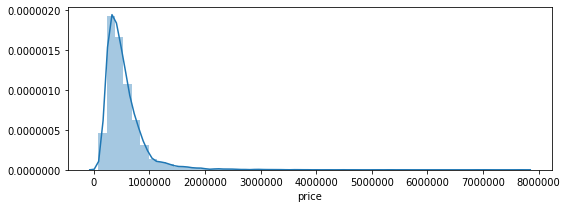

In [41]:
fig, ax = plt.subplots(figsize=(8, 3))
ax = sns.distplot(df['price'])
plt.tight_layout()
plt.show()

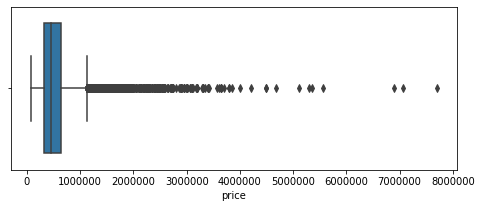

In [51]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x= 'price',data = df)

In [3]:
df[df['price']>1000000]

cid         dayhours    price  room_bed  room_bath  \
28     7855000460  20141007T000000  1450000         3       2.75   
30     9206500250  20140909T000000  1100000         4       4.00   
33     7237500390  20141110T000000  1570000         5       4.50   
50     5154700060  20141015T000000  1660000         4       2.75   
61     4055700030  20150502T000000  1450000         3       4.50   
...           ...              ...      ...       ...        ...   
21521   328000160  20141211T000000  1400000         5       3.75   
21557  3758900075  20140507T000000  1530000         5       4.50   
21566  1651500040  20140801T000000  1980000         4       4.00   
21572  8043700105  20150417T000000  2300000         4       4.00   
21579  4141800215  20141126T000000  1500000         4       3.75   

       living_measure  lot_measure  ceil  coast  sight  ...  basement  \
28               3940         9671   1.0      0      4  ...      1800   
30               3770         8899   2.0      0      0  ...       830   
33               6070        14731   2.0      0      0  ...         0   
50               3520        19200   1.0      1      4  ...      1570   
61               3970        24920   2.0      0      2  ...       710   
...               ...          ...   ...    ...    ...  ...       ...   
21521            3700         7920   3.0      0      4  ...       800   
21557            4270         8076   2.0      0      0  ...       870   
21566            4360        12081   2.0      0      0  ...         0   
21572            4360         8175   2.5      1      4  ...       420   
21579            3770         4000   2.5      0      0  ...       880   

       yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
28         1967             0    98006  47.5654 -122.158              3390   
30         2006             0    98074  47.6476 -122.079              3300   
33         2004             0    98059  47.5306 -122.134              4750   
50         1951             0    98136  47.5250 -122.393              2450   
61         1977          1999    98034  47.7183 -122.258              2610   
...         ...           ...      ...      ...      ...               ...   
21521      1983             0    98115  47.6865 -122.266              2860   
21557      2007             0    98033  47.6990 -122.206              4100   
21566      2007             0    98004  47.6377 -122.219              2180   
21572      2007             0    98008  47.5724 -122.104              2670   
21579      1916             0    98122  47.6157 -122.287              2800   

       lot_measure15  furnished  total_area  
28              9360          1       13611  
30              8308          1       12669  
33             13404          1       20801  
50              7000          1       22720  
61             13838          1       28890  
...              ...        ...         ...  
21521           6360          1       11620  
21557          10631          1       12346  
21566          10800          1       16441  
21572           8525          1       12535  
21579           5000          1        7770  

[1460 rows x 23 columns]

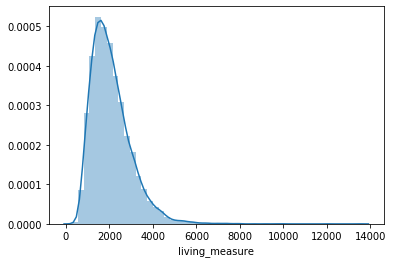

In [9]:
sns.distplot(df['living_measure'])

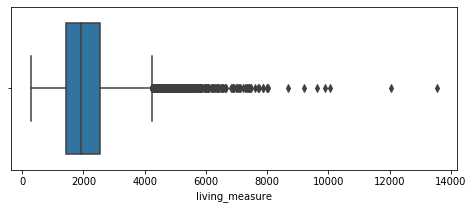

In [52]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x= 'living_measure',data = df)

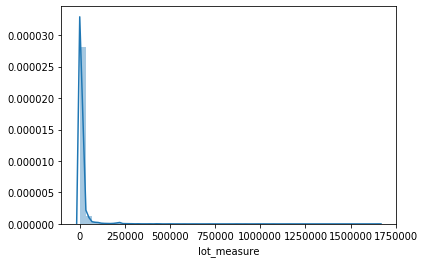

In [11]:
sns.distplot(df['lot_measure'])

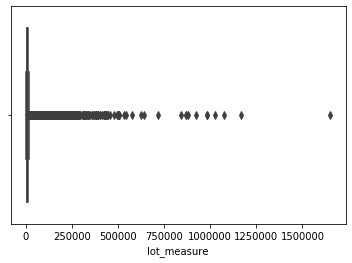

In [53]:
sns.boxplot(x= 'lot_measure',data = df)

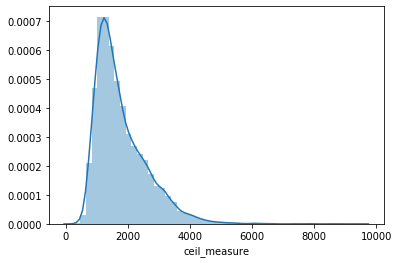

In [14]:
sns.distplot(df['ceil_measure'])

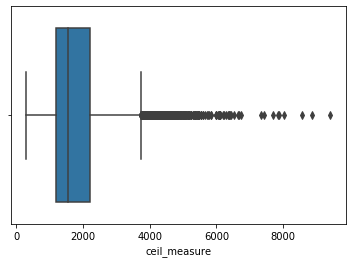

In [54]:
sns.boxplot(x= 'ceil_measure',data = df)

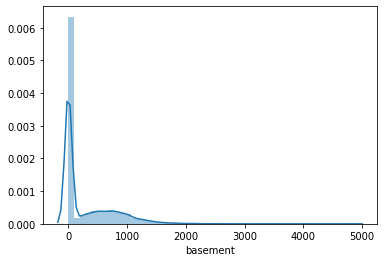

In [16]:
sns.distplot(df['basement'])

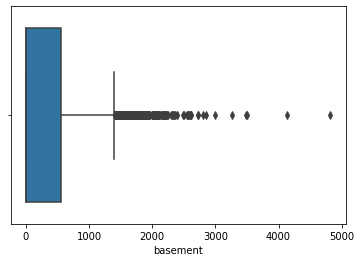

In [55]:
sns.boxplot(x= 'basement',data = df)

In [53]:
basement = df[df['basement']==0]

In [56]:
(basement.shape[0]/df.shape[0])*100

60.73196687179012

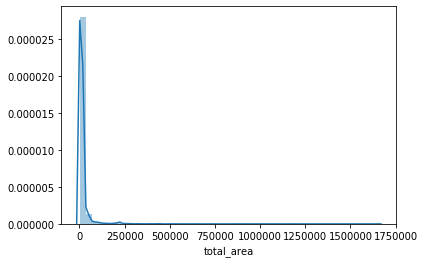

In [42]:
sns.distplot(df['total_area'])

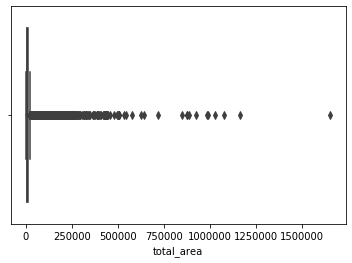

In [41]:
sns.boxplot(x= 'total_area',data = df)

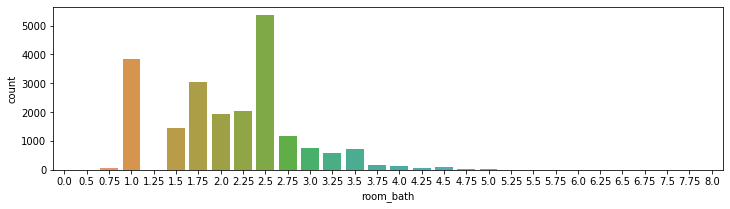

In [58]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(df['room_bath'])

In [35]:
df['room_bath'].value_counts(normalize = 'index').shape

(30,)

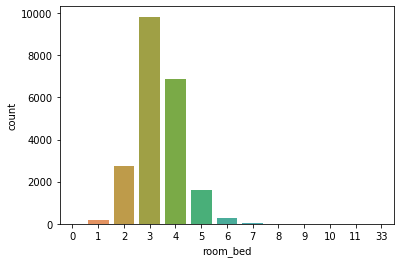

In [61]:
sns.countplot(df['room_bed'])

In [5]:
df['room_bed'].value_counts(normalize = 'index')

3     0.454541
4     0.318419
2     0.127701
5     0.074076
6     0.012585
1     0.009207
7     0.001758
8     0.000601
0     0.000601
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: room_bed, dtype: float64

In [27]:
values=df['room_bed'].value_counts(normalize = 'index')
labels=df['room_bed'].value_counts().index
explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0]

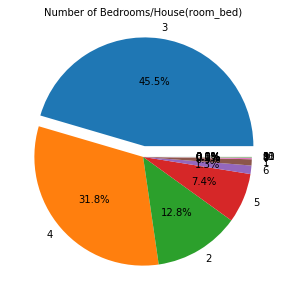

In [30]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')
plt.title('Number of Bedrooms/House(room_bed)',color='black',fontsize=10)
plt.show()

In [40]:
values=df['room_bath'].value_counts(normalize = 'index')
labels=df['room_bath'].value_counts().index
explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

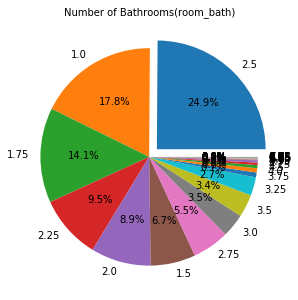

In [41]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')
plt.title('Number of Bathrooms(room_bath)',color='black',fontsize=10)
plt.show()

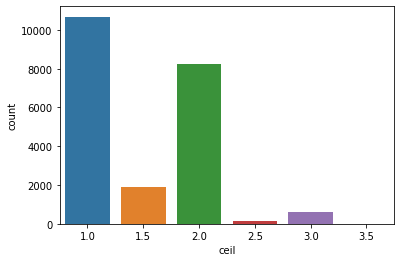

In [62]:
sns.countplot(df['ceil'])

In [31]:
values=df['ceil'].value_counts(normalize = 'index')
labels=df['ceil'].value_counts().index
explode=[0.1,0,0,0,0,0]

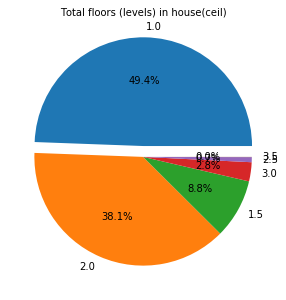

In [32]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')

plt.title('Total floors (levels) in house(ceil)',color='black',fontsize=10)
plt.show()

[Text(0, 0, '98001'),
 Text(0, 0, '98002'),
 Text(0, 0, '98003'),
 Text(0, 0, '98004'),
 Text(0, 0, '98005'),
 Text(0, 0, '98006'),
 Text(0, 0, '98007'),
 Text(0, 0, '98008'),
 Text(0, 0, '98010'),
 Text(0, 0, '98011'),
 Text(0, 0, '98014'),
 Text(0, 0, '98019'),
 Text(0, 0, '98022'),
 Text(0, 0, '98023'),
 Text(0, 0, '98024'),
 Text(0, 0, '98027'),
 Text(0, 0, '98028'),
 Text(0, 0, '98029'),
 Text(0, 0, '98030'),
 Text(0, 0, '98031'),
 Text(0, 0, '98032'),
 Text(0, 0, '98033'),
 Text(0, 0, '98034'),
 Text(0, 0, '98038'),
 Text(0, 0, '98039'),
 Text(0, 0, '98040'),
 Text(0, 0, '98042'),
 Text(0, 0, '98045'),
 Text(0, 0, '98052'),
 Text(0, 0, '98053'),
 Text(0, 0, '98055'),
 Text(0, 0, '98056'),
 Text(0, 0, '98058'),
 Text(0, 0, '98059'),
 Text(0, 0, '98065'),
 Text(0, 0, '98070'),
 Text(0, 0, '98072'),
 Text(0, 0, '98074'),
 Text(0, 0, '98075'),
 Text(0, 0, '98077'),
 Text(0, 0, '98092'),
 Text(0, 0, '98102'),
 Text(0, 0, '98103'),
 Text(0, 0, '98105'),
 Text(0, 0, '98106'),
 Text(0, 0

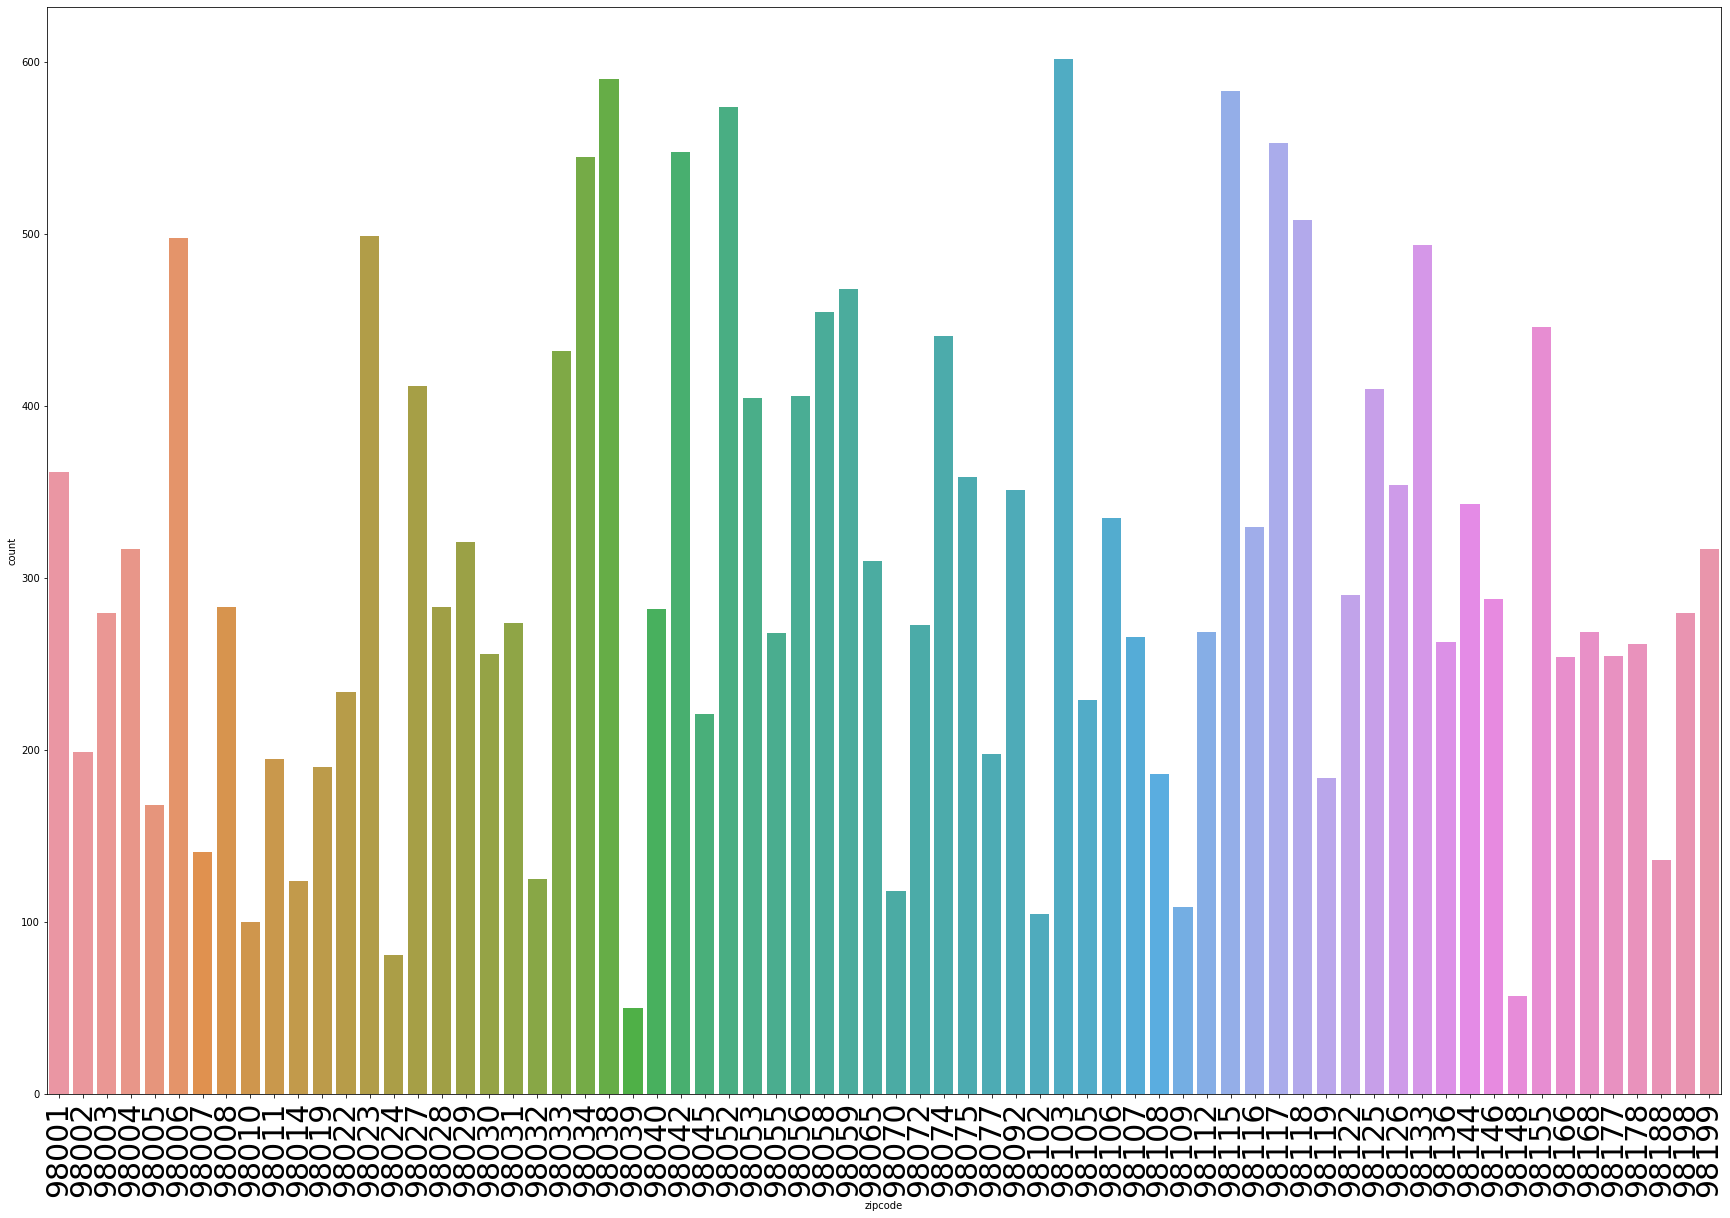

In [22]:
fig,ax = plt.subplots(figsize=(30, 20))
sns.countplot(df['zipcode'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=30)

In [43]:
values=df['sight'].value_counts(normalize = 'index')
labels=df['sight'].value_counts().index
explode=[0.1,0,0,0,0]

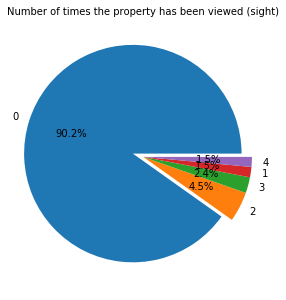

In [44]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')

plt.title('Number of times the property has been viewed (sight)',color='black',fontsize=10)
plt.show()

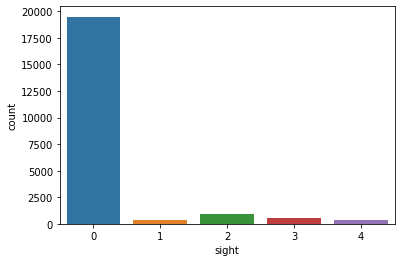

In [23]:
sns.countplot(df['sight'])

In [45]:
values=df['condition'].value_counts(normalize = 'index')
labels=df['condition'].value_counts().index
explode=[0.1,0,0,0,0]

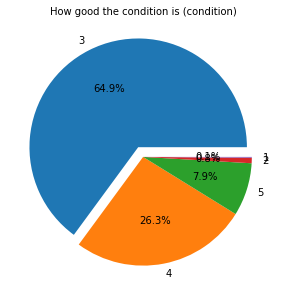

In [46]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')

plt.title('How good the condition is (condition)',color='black',fontsize=10)
plt.show()

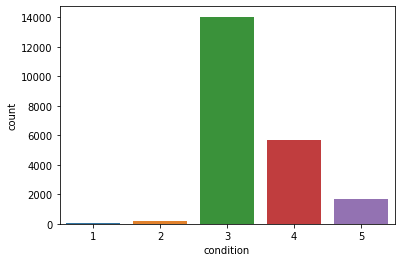

In [24]:
sns.countplot(df['condition'])

In [49]:
values=df['coast'].value_counts(normalize = 'index')
labels=df['coast'].value_counts().index
explode=[0.1,0]

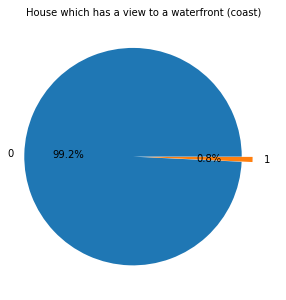

In [50]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')

plt.title('House which has a view to a waterfront (coast)',color='black',fontsize=10)
plt.show()

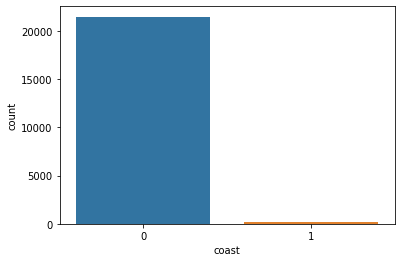

In [25]:
sns.countplot(df['coast'])

In [51]:
values=df['quality'].value_counts(normalize = 'index')
labels=df['quality'].value_counts().index
explode=[0.1,0,0,0,0,0,0,0,0,0,0,0]

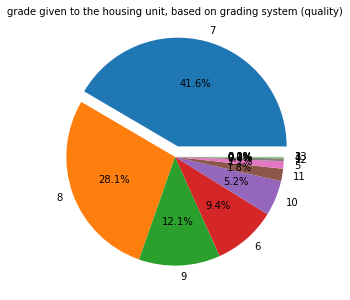

In [52]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')

plt.title('grade given to the housing unit, based on grading system (quality)',color='black',fontsize=10)
plt.show()

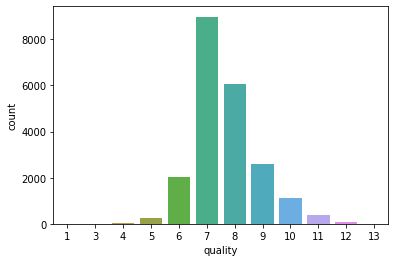

In [26]:
sns.countplot(df['quality'])

[Text(0, 0, '1900'),
 Text(0, 0, '1901'),
 Text(0, 0, '1902'),
 Text(0, 0, '1903'),
 Text(0, 0, '1904'),
 Text(0, 0, '1905'),
 Text(0, 0, '1906'),
 Text(0, 0, '1907'),
 Text(0, 0, '1908'),
 Text(0, 0, '1909'),
 Text(0, 0, '1910'),
 Text(0, 0, '1911'),
 Text(0, 0, '1912'),
 Text(0, 0, '1913'),
 Text(0, 0, '1914'),
 Text(0, 0, '1915'),
 Text(0, 0, '1916'),
 Text(0, 0, '1917'),
 Text(0, 0, '1918'),
 Text(0, 0, '1919'),
 Text(0, 0, '1920'),
 Text(0, 0, '1921'),
 Text(0, 0, '1922'),
 Text(0, 0, '1923'),
 Text(0, 0, '1924'),
 Text(0, 0, '1925'),
 Text(0, 0, '1926'),
 Text(0, 0, '1927'),
 Text(0, 0, '1928'),
 Text(0, 0, '1929'),
 Text(0, 0, '1930'),
 Text(0, 0, '1931'),
 Text(0, 0, '1932'),
 Text(0, 0, '1933'),
 Text(0, 0, '1934'),
 Text(0, 0, '1935'),
 Text(0, 0, '1936'),
 Text(0, 0, '1937'),
 Text(0, 0, '1938'),
 Text(0, 0, '1939'),
 Text(0, 0, '1940'),
 Text(0, 0, '1941'),
 Text(0, 0, '1942'),
 Text(0, 0, '1943'),
 Text(0, 0, '1944'),
 Text(0, 0, '1945'),
 Text(0, 0, '1946'),
 Text(0, 0, '

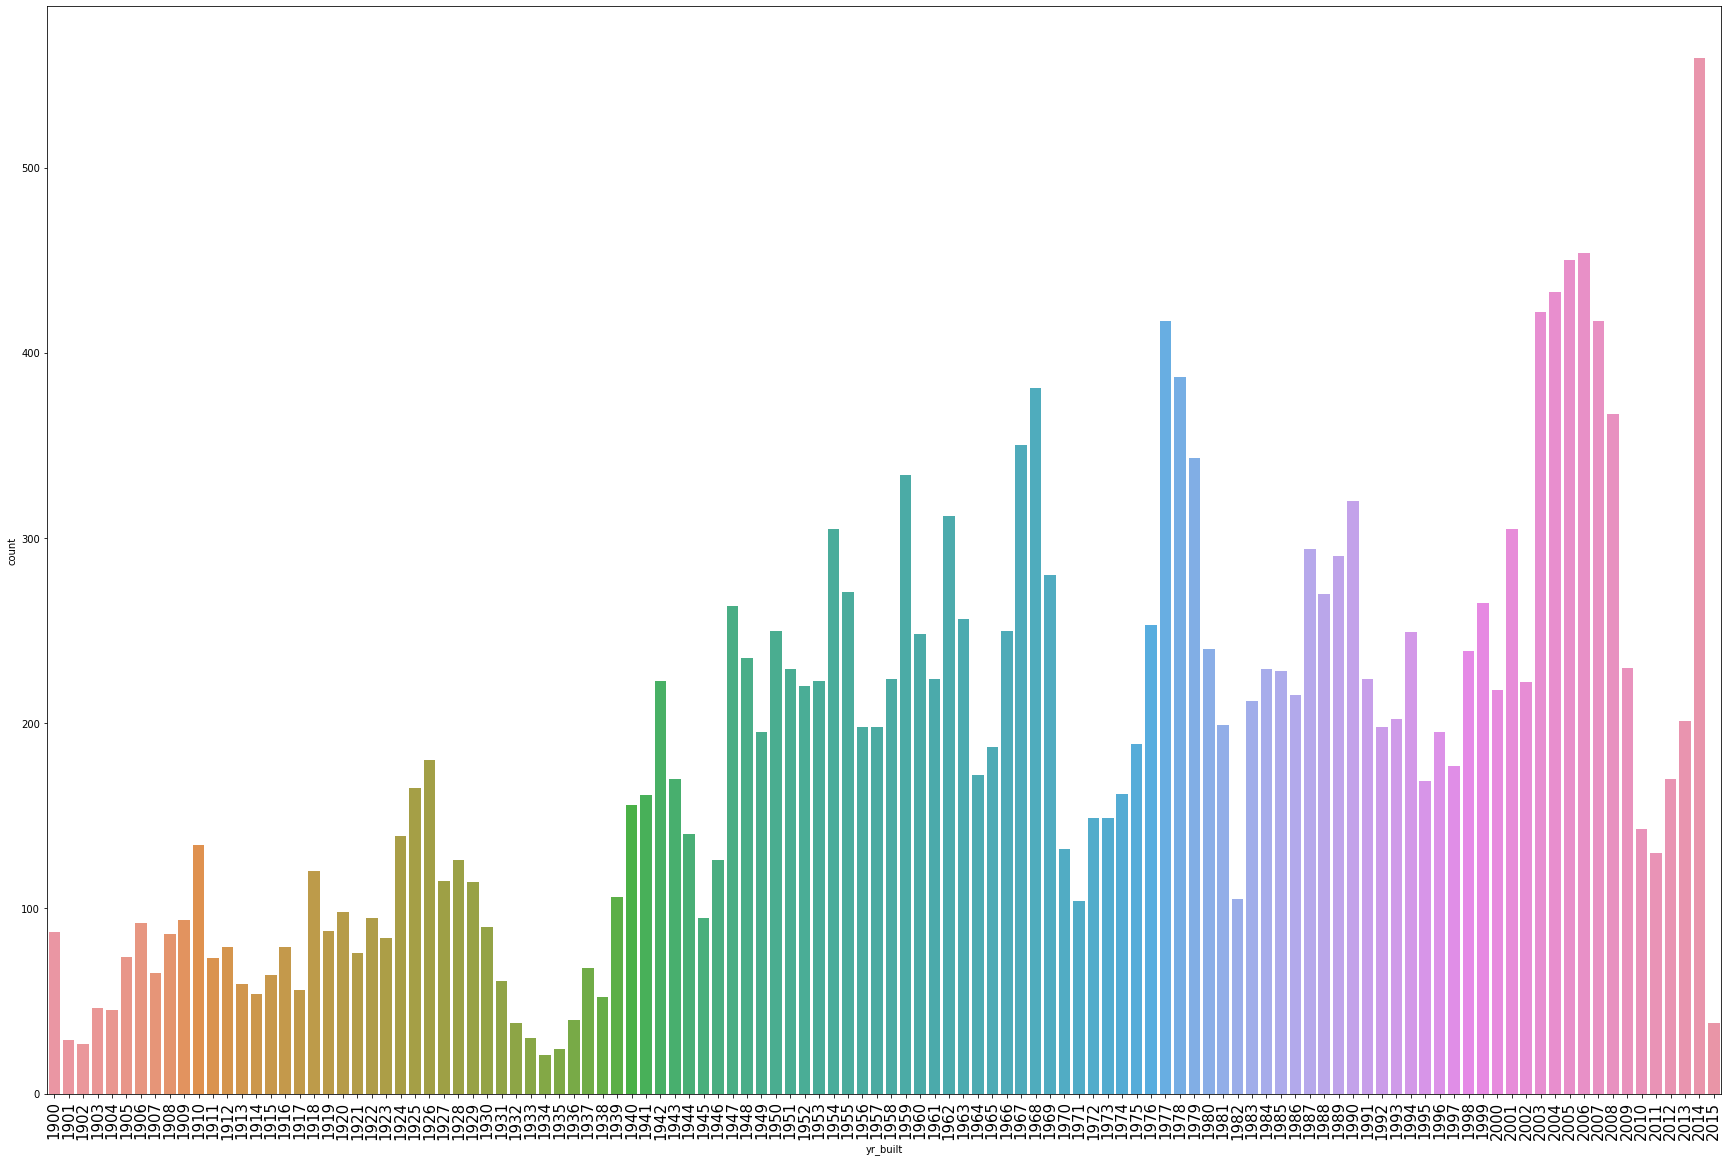

In [30]:
fig,ax = plt.subplots(figsize=(30, 20))
sns.countplot(df['yr_built'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)

In [4]:
renovated = df[df['yr_renovated']!=0]

In [5]:
renovated.shape

(914, 23)

In [7]:
(1-(renovated.shape[0]/df.shape[0]))*100

95.77106371165502

[Text(0, 0, '1934'),
 Text(0, 0, '1940'),
 Text(0, 0, '1944'),
 Text(0, 0, '1945'),
 Text(0, 0, '1946'),
 Text(0, 0, '1948'),
 Text(0, 0, '1950'),
 Text(0, 0, '1951'),
 Text(0, 0, '1953'),
 Text(0, 0, '1954'),
 Text(0, 0, '1955'),
 Text(0, 0, '1956'),
 Text(0, 0, '1957'),
 Text(0, 0, '1958'),
 Text(0, 0, '1959'),
 Text(0, 0, '1960'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '

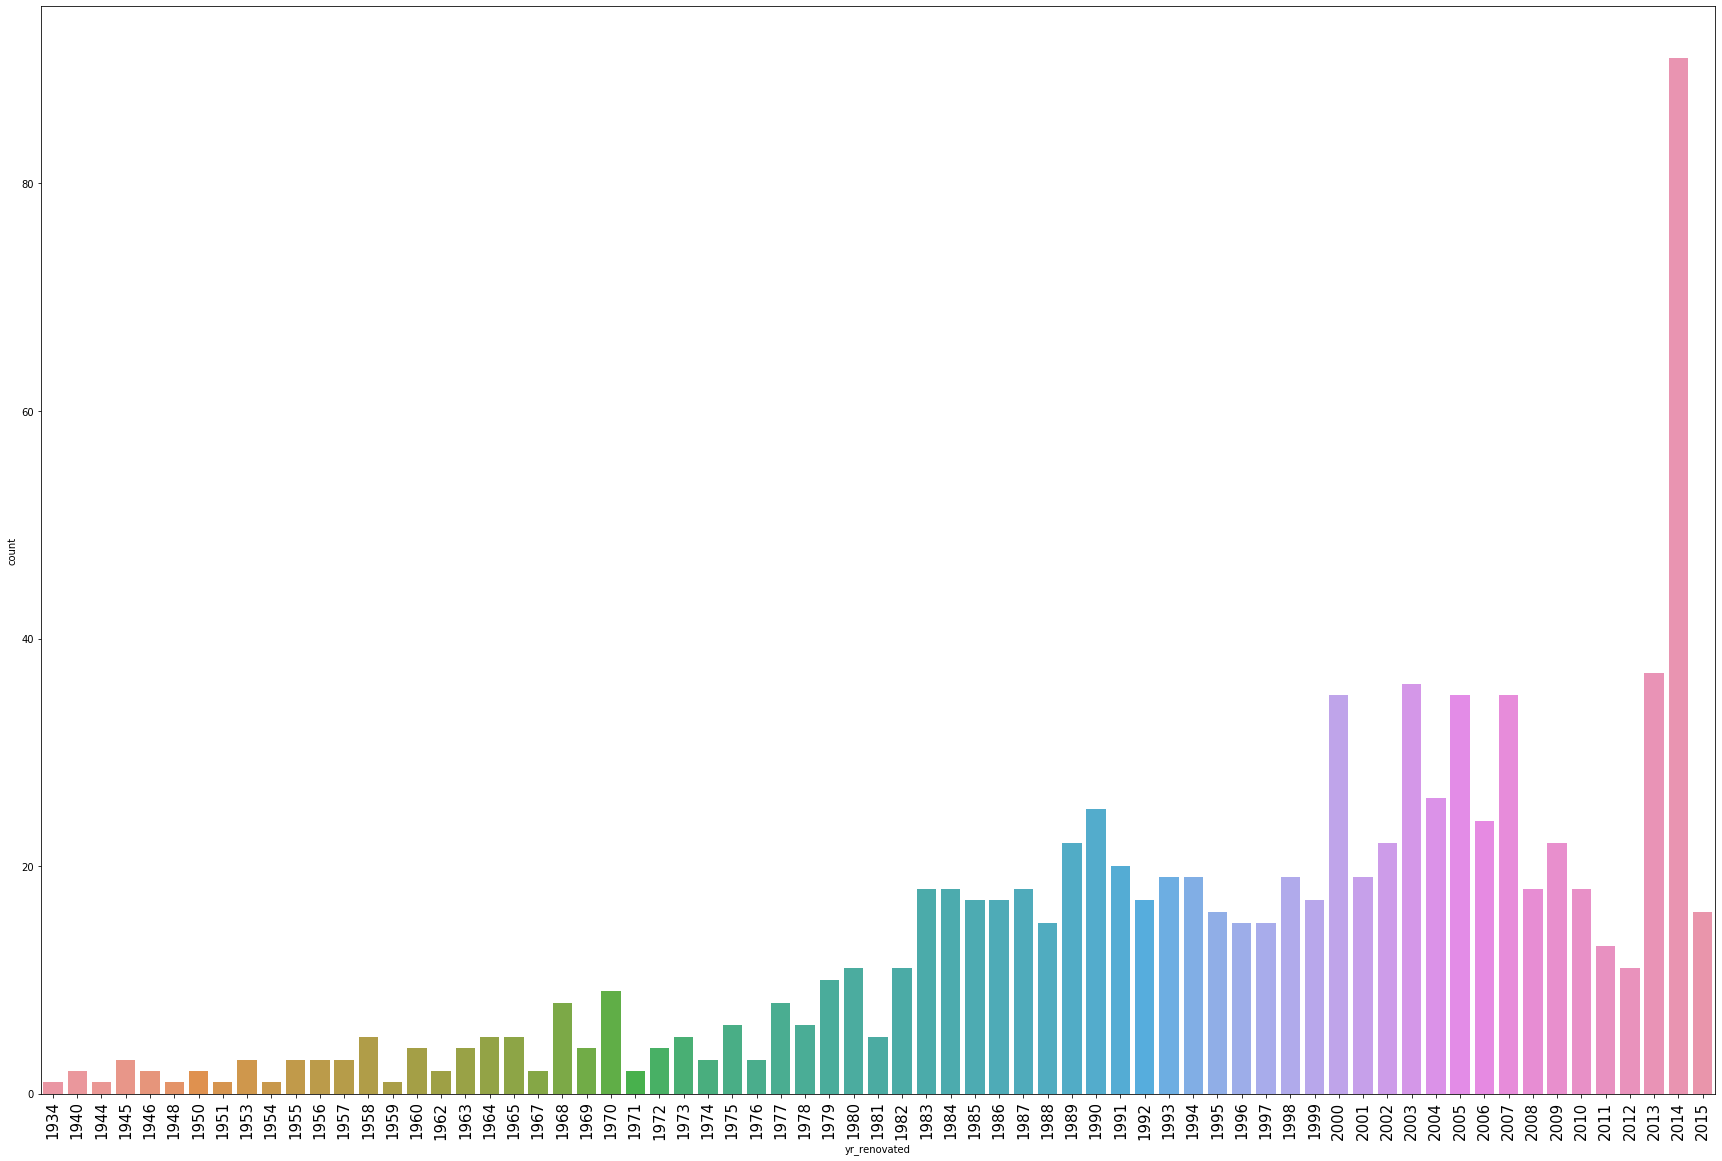

In [37]:
fig,ax = plt.subplots(figsize=(30, 20))
sns.countplot(renovated['yr_renovated'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)

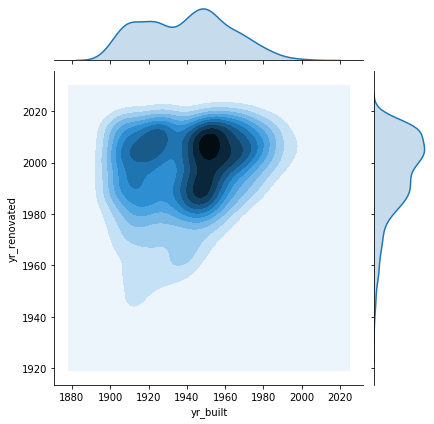

In [65]:
sns.jointplot(x="yr_built", y="yr_renovated",kind = 'kde', data=renovated)

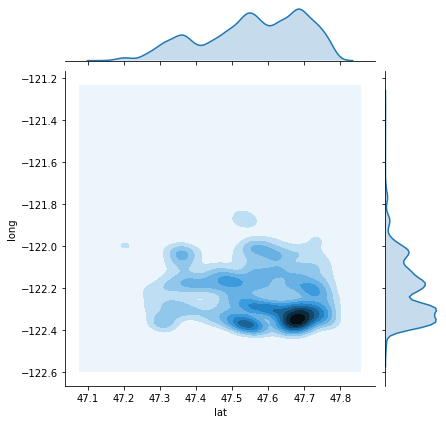

In [57]:
sns.jointplot(x="lat", y="long",kind = 'kde', data=df)

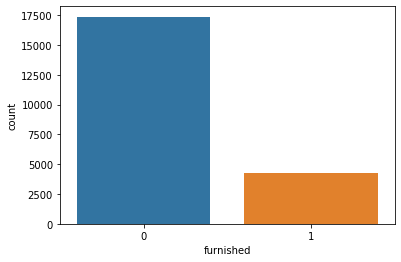

In [40]:
sns.countplot(df['furnished'])

In [67]:
values=df['furnished'].value_counts(normalize = 'index')
labels=df['furnished'].value_counts().index
explode=[0.1,0]

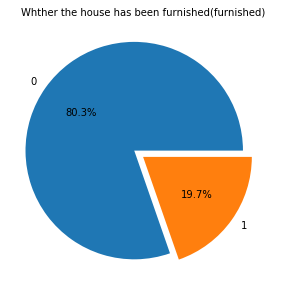

In [68]:
plt.figure(figsize=(5,5))
plt.pie(values,explode = explode,labels=labels,autopct='%1.1f%%')

plt.title('Whther the house has been furnished(furnished)',color='black',fontsize=10)
plt.show()

# MultiVariate  Analysis

In [4]:
df.groupby('room_bed').describe()['price']

count          mean            std       min        25%       50%  \
room_bed                                                                       
0           13.0  4.102231e+05  360374.846292  139950.0  235000.00  288000.0   
1          199.0  3.176580e+05  148959.667008   75000.0  222000.00  299000.0   
2         2760.0  4.013877e+05  198128.920756   78000.0  269837.50  374000.0   
3         9824.0  4.662766e+05  262620.685862   82000.0  295487.50  413000.0   
4         6882.0  6.355647e+05  388901.182117  100000.0  376962.50  549997.5   
5         1601.0  7.868741e+05  596536.599057  133000.0  438000.00  620000.0   
6          272.0  8.258535e+05  799610.343019  175000.0  435000.00  650000.0   
7           38.0  9.514478e+05  740350.184560  280000.0  539250.00  728580.0   
8           13.0  1.105077e+06  897495.725295  340000.0  490000.00  700000.0   
9            6.0  8.939998e+05  381533.900984  450000.0  624999.25  817000.0   
10           3.0  8.200000e+05  285832.118559  650000.0  655000.00  660000.0   
11           1.0  5.200000e+05            NaN  520000.0  520000.00  520000.0   
33           1.0  6.400000e+05            NaN  640000.0  640000.00  640000.0   

                75%        max  
room_bed                        
0          355000.0  1300000.0  
1          390000.0  1250000.0  
2          490000.0  3280000.0  
3          560000.0  3800000.0  
4          765000.0  4490000.0  
5          913888.0  7060000.0  
6          896250.0  7700000.0  
7          946500.0  3200000.0  
8         1650000.0  3300000.0  
9         1193500.0  1400000.0  
10         905000.0  1150000.0  
11         520000.0   520000.0  
33         640000.0   640000.0

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '33')]

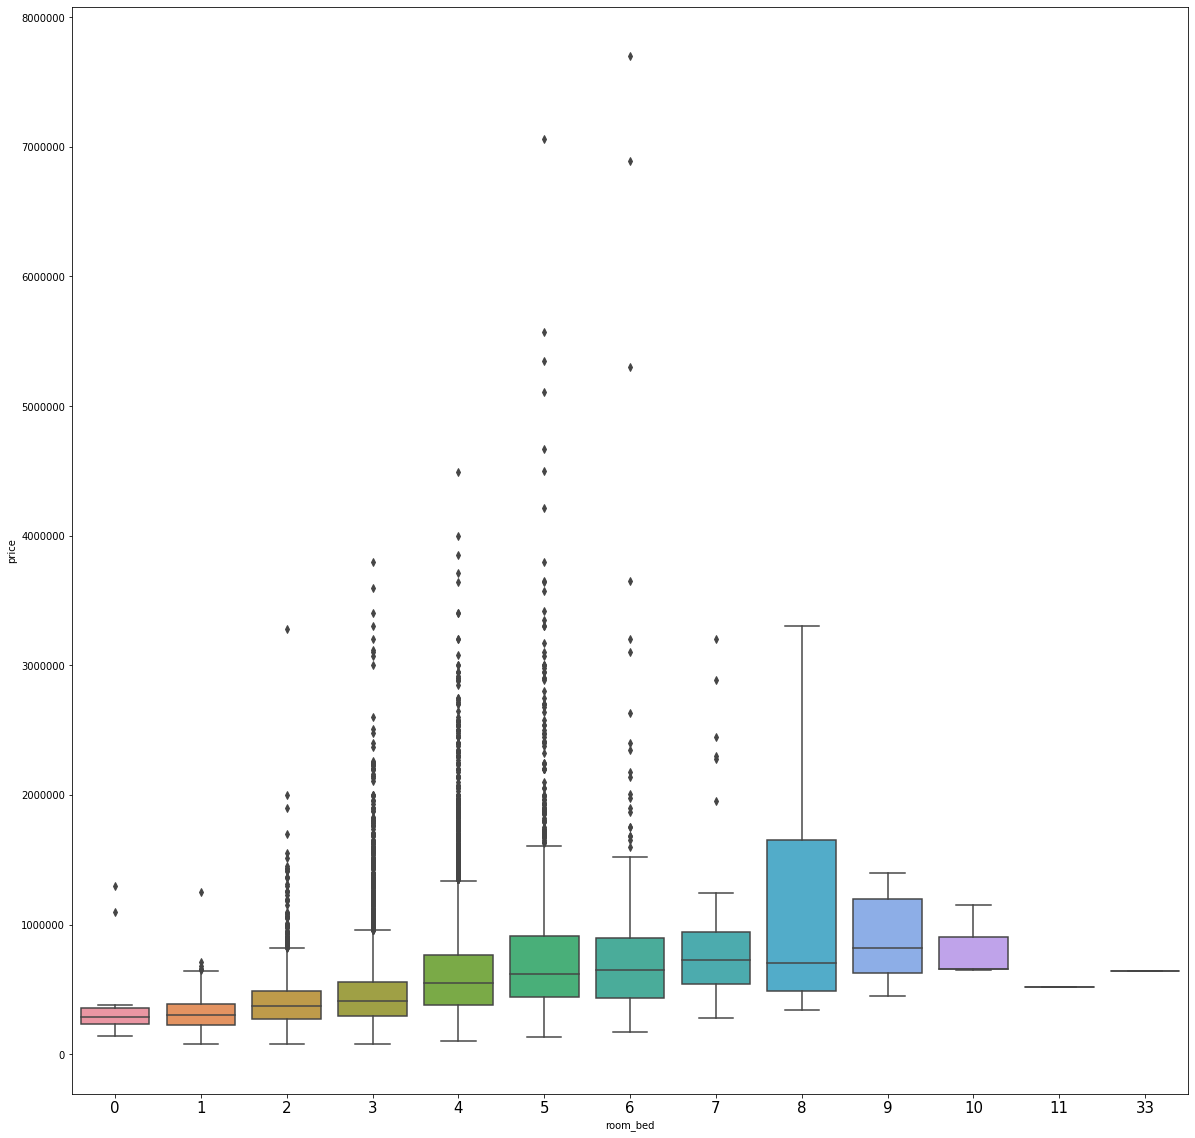

In [12]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x= 'room_bed',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

In [80]:
df[df['room_bed']==33]

cid         dayhours   price  room_bed  room_bath  living_measure  \
750  2402100895  20140625T000000  640000        33       1.75            1620   

     lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
750         6000   1.0      0      0  ...       580      1947             0   

     zipcode      lat     long  living_measure15  lot_measure15  furnished  \
750    98103  47.6878 -122.331              1330           4700          0   

     total_area  
750        7620  

[1 rows x 23 columns]

In [81]:
df[df['room_bed']==11]

cid         dayhours   price  room_bed  room_bath  \
14941  1773100755  20140821T000000  520000        11        3.0   

       living_measure  lot_measure  ceil  coast  sight  ...  basement  \
14941            3000         4960   2.0      0      0  ...       600   

       yr_built  yr_renovated  zipcode     lat     long  living_measure15  \
14941      1918          1999    98106  47.556 -122.363              1420   

       lot_measure15  furnished  total_area  
14941           4960          0        7960  

[1 rows x 23 columns]

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '33')]

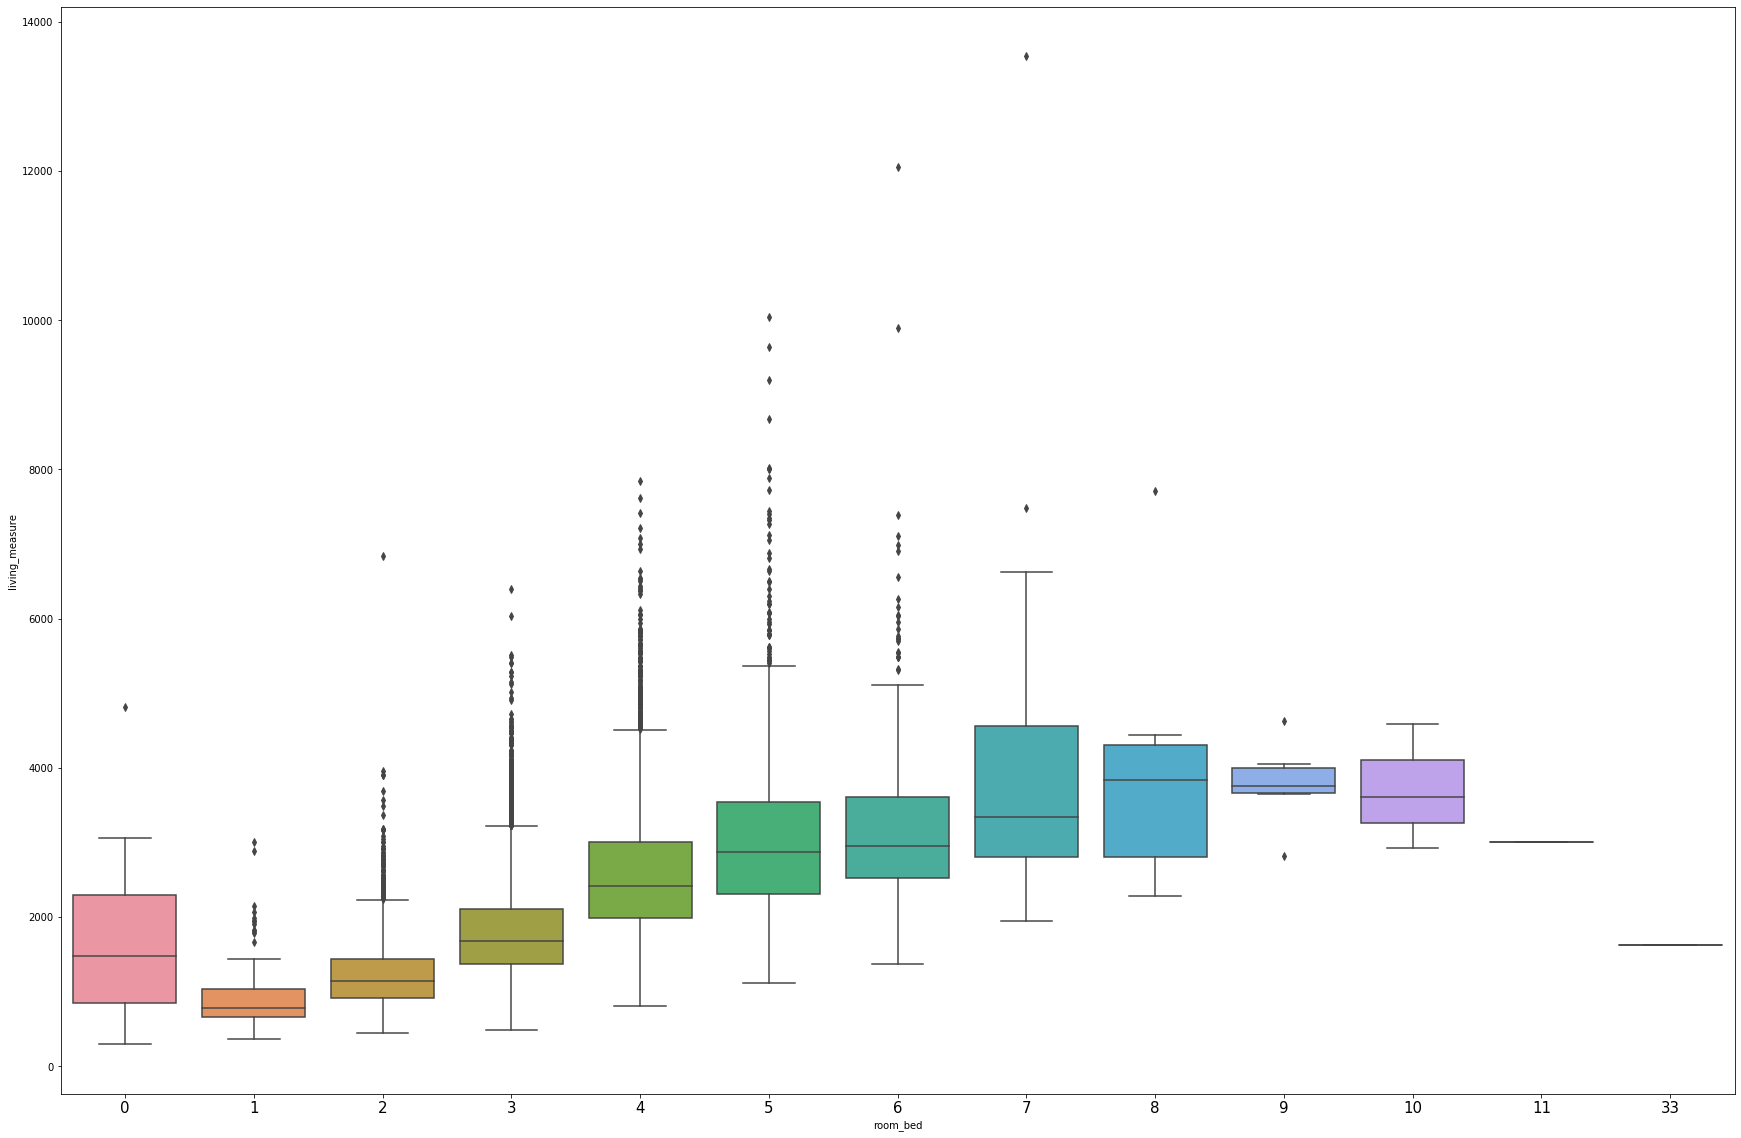

In [82]:
fig,ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x= 'room_bed',y = 'living_measure',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

In [83]:
df.groupby('room_bath').describe()['price']

count          mean           std        min        25%  \
room_bath                                                             
0.00         10.0  4.490950e+05  4.172420e+05    75000.0   165250.0   
0.50          4.0  2.373750e+05  8.888886e+04   109000.0   218500.0   
0.75         72.0  2.945209e+05  1.380845e+05    80000.0   201500.0   
1.00       3852.0  3.470412e+05  1.545593e+05    78000.0   230000.0   
1.25          9.0  6.217722e+05  4.088817e+05   275000.0   360000.0   
1.50       1446.0  4.093457e+05  1.938899e+05   107000.0   265962.5   
1.75       3048.0  4.549158e+05  2.020492e+05   115000.0   310000.0   
2.00       1930.0  4.579050e+05  2.060723e+05   115000.0   300500.0   
2.25       2047.0  5.337688e+05  2.811597e+05   160000.0   339975.0   
2.50       5380.0  5.536618e+05  2.670659e+05   153503.0   365000.0   
2.75       1185.0  6.603505e+05  3.098475e+05   183750.0   437000.0   
3.00        753.0  7.086619e+05  4.308749e+05   154000.0   436000.0   
3.25        589.0  9.707532e+05  5.633904e+05   176000.0   589500.0   
3.50        731.0  9.324017e+05  4.652734e+05   216650.0   619500.0   
3.75        155.0  1.198179e+06  5.902669e+05   255000.0   805250.0   
4.00        136.0  1.268405e+06  6.933076e+05   265000.0   796300.0   
4.25         79.0  1.526653e+06  7.616379e+05   490000.0   927500.0   
4.50        100.0  1.334211e+06  8.910568e+05   290000.0   808000.0   
4.75         23.0  2.022300e+06  8.672724e+05   480000.0  1360000.0   
5.00         21.0  1.674167e+06  1.248295e+06   343000.0   740000.0   
5.25         13.0  1.817962e+06  1.241665e+06   300000.0  1150000.0   
5.50         10.0  2.522500e+06  1.254634e+06   925000.0  1525000.0   
5.75          4.0  2.492500e+06  2.153778e+06   540000.0  1575000.0   
6.00          6.0  2.948333e+06  1.706475e+06   900000.0  1655000.0   
6.25          2.0  3.095000e+06  2.899138e+05  2890000.0  2992500.0   
6.50          2.0  1.710000e+06  7.495332e+05  1180000.0  1445000.0   
6.75          2.0  2.735000e+06  2.736503e+06   800000.0  1767500.0   
7.50          1.0  4.500000e+05           NaN   450000.0   450000.0   
7.75          1.0  6.890000e+06           NaN  6890000.0  6890000.0   
8.00          2.0  4.990000e+06  3.832519e+06  2280000.0  3635000.0   

                 50%        75%        max  
room_bath                                   
0.00        317500.0   458000.0  1300000.0  
0.50        264000.0   282875.0   312500.0  
0.75        273500.0   355000.0   785000.0  
1.00        320000.0   425000.0  1300000.0  
1.25        516500.0   545000.0  1390000.0  
1.50        370000.0   495600.0  1500000.0  
1.75        422900.0   555000.0  3280000.0  
2.00        423250.0   563000.0  2200000.0  
2.25        472500.0   625000.0  2400000.0  
2.50        499950.0   675000.0  3070000.0  
2.75        605000.0   796500.0  2700000.0  
3.00        600000.0   850000.0  4490000.0  
3.25        835000.0  1190000.0  3640000.0  
3.50        820000.0  1150000.0  3710000.0  
3.75       1070000.0  1515000.0  3650000.0  
4.00       1055000.0  1527500.0  3400000.0  
4.25       1380000.0  1965000.0  3850000.0  
4.50       1060000.0  1662500.0  7060000.0  
4.75       2300000.0  2585000.0  3650000.0  
5.00       1430000.0  1880000.0  5350000.0  
5.25       1420000.0  2250000.0  5110000.0  
5.50       2340000.0  3595000.0  4500000.0  
5.75       1930000.0  2847500.0  5570000.0  
6.00       2895000.0  4067500.0  5300000.0  
6.25       3095000.0  3197500.0  3300000.0  
6.50       1710000.0  1975000.0  2240000.0  
6.75       2735000.0  3702500.0  4670000.0  
7.50        450000.0   450000.0   450000.0  
7.75       6890000.0  6890000.0  6890000.0  
8.00       4990000.0  6345000.0  7700000.0

[Text(0, 0, '0.0'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.75'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.25'),
 Text(0, 0, '1.5'),
 Text(0, 0, '1.75'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.25'),
 Text(0, 0, '2.5'),
 Text(0, 0, '2.75'),
 Text(0, 0, '3.0'),
 Text(0, 0, '3.25'),
 Text(0, 0, '3.5'),
 Text(0, 0, '3.75'),
 Text(0, 0, '4.0'),
 Text(0, 0, '4.25'),
 Text(0, 0, '4.5'),
 Text(0, 0, '4.75'),
 Text(0, 0, '5.0'),
 Text(0, 0, '5.25'),
 Text(0, 0, '5.5'),
 Text(0, 0, '5.75'),
 Text(0, 0, '6.0'),
 Text(0, 0, '6.25'),
 Text(0, 0, '6.5'),
 Text(0, 0, '6.75'),
 Text(0, 0, '7.5'),
 Text(0, 0, '7.75'),
 Text(0, 0, '8.0')]

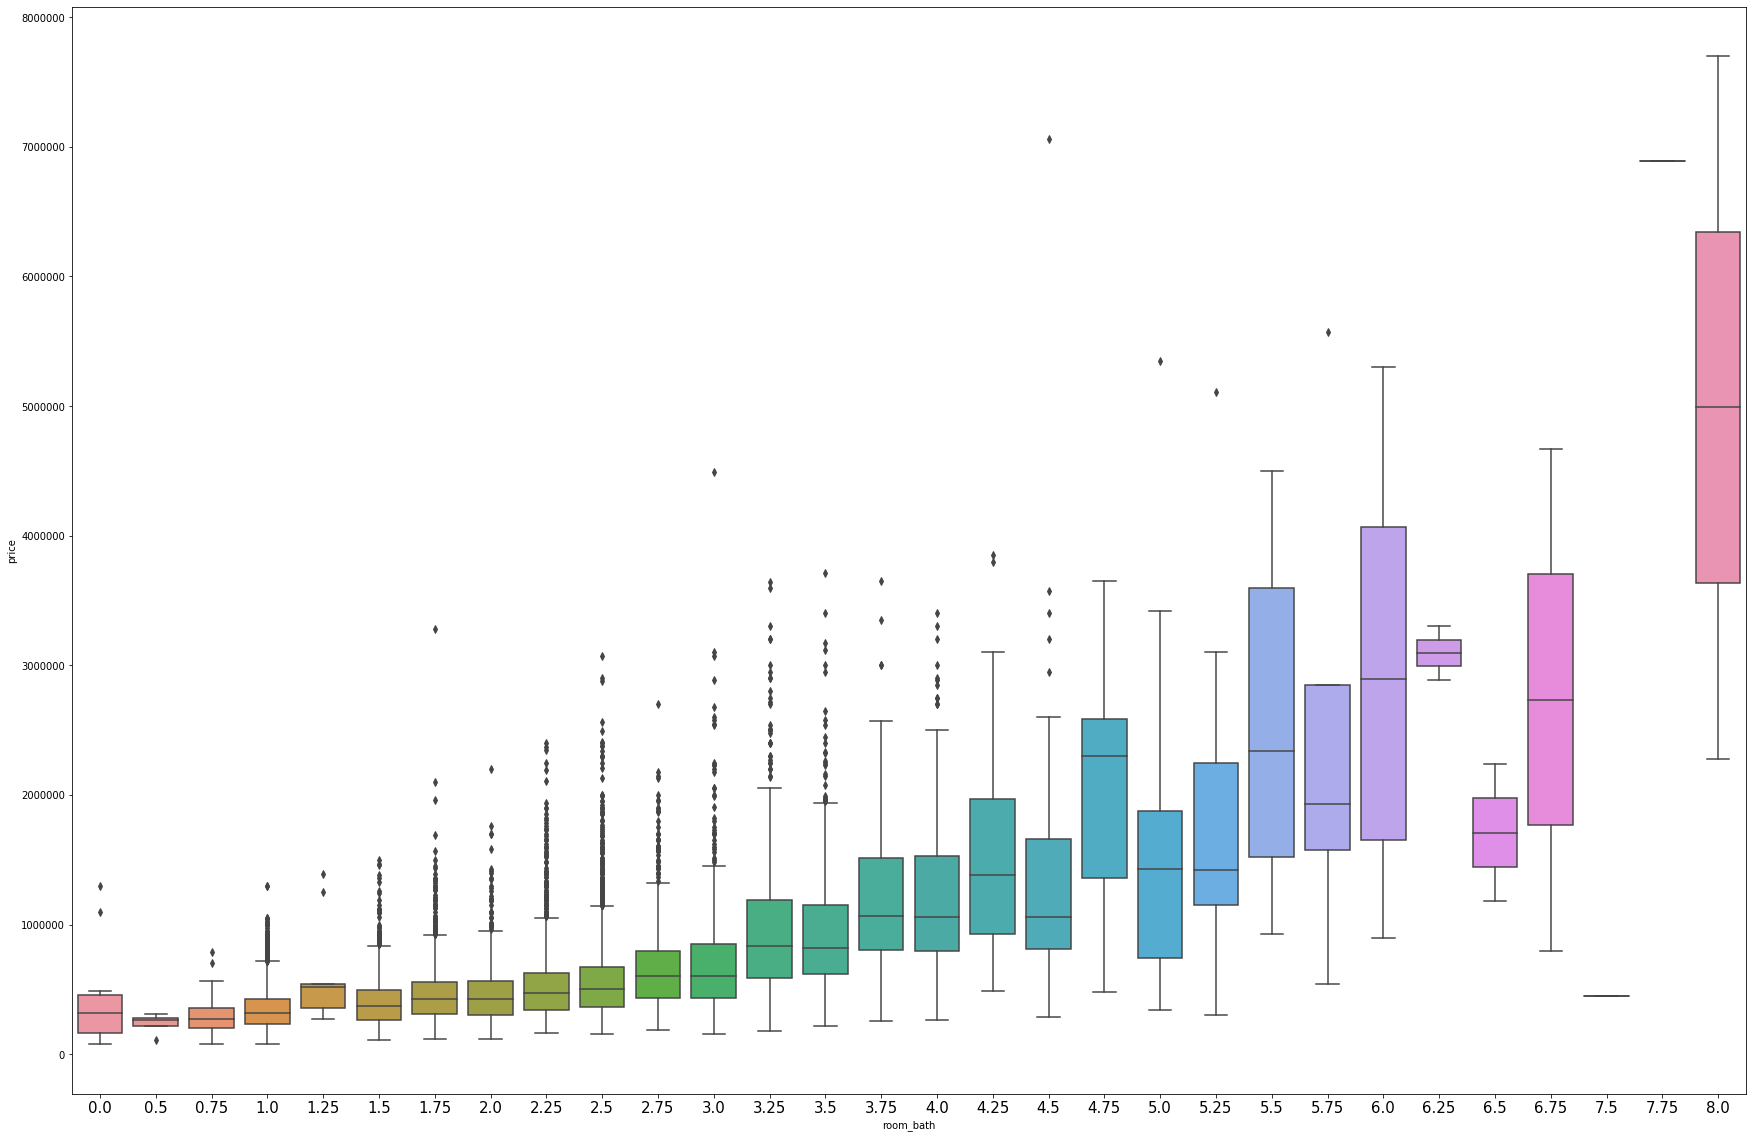

In [84]:
fig,ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x= 'room_bath',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

In [85]:
df.groupby('ceil').describe()['price']

count          mean            std       min       25%       50%  \
ceil                                                                       
1.0   10680.0  4.422196e+05  264156.610688   75000.0  275000.0  390000.0   
1.5    1910.0  5.590449e+05  303722.101177   92000.0  355000.0  524475.0   
2.0    8241.0  6.490515e+05  434225.634010   90000.0  378800.0  542950.0   
2.5     161.0  1.061021e+06  858836.032602  255000.0  550000.0  799200.0   
3.0     613.0  5.826201e+05  338499.140322  205000.0  385000.0  490000.0   
3.5       8.0  9.339375e+05  978736.081364  435000.0  513500.0  534500.0   

            75%        max  
ceil                        
1.0    530000.0  4670000.0  
1.5    687875.0  3650000.0  
2.0    772500.0  7060000.0  
2.5   1300000.0  7700000.0  
3.0    631500.0  3100000.0  
3.5    697625.0  3300000.0

[Text(0, 0, '1.0'),
 Text(0, 0, '1.5'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.5'),
 Text(0, 0, '3.0'),
 Text(0, 0, '3.5')]

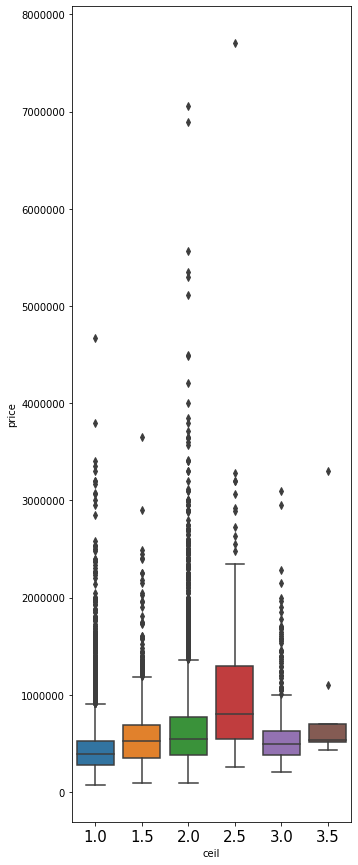

In [86]:
fig,ax = plt.subplots(figsize=(5, 15))
sns.boxplot(x= 'ceil',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

In [87]:
df.groupby('coast').describe()['price']

count          mean           std       min       25%        50%  \
coast                                                                       
0      21450.0  5.316534e+05  3.418398e+05   75000.0  320000.0   450000.0   
1        163.0  1.662524e+06  1.120388e+06  285000.0  760000.0  1400000.0   

             75%        max  
coast                        
0       639897.0  7700000.0  
1      2215000.0  7060000.0

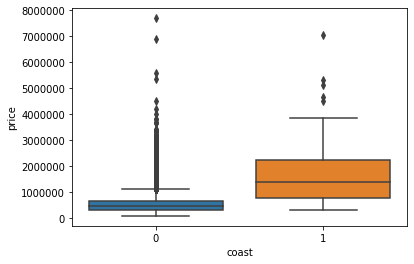

In [88]:
sns.boxplot(x= 'coast',y = 'price',data = df)

In [89]:
df.groupby('sight').describe()['price']

count          mean            std       min       25%        50%  \
sight                                                                        
0      19489.0  4.966235e+05  287316.466039   75000.0  311000.0   432500.0   
1        332.0  8.125186e+05  511346.054675  217000.0  498750.0   690944.0   
2        963.0  7.927462e+05  510517.106752  169317.0  485000.0   675000.0   
3        510.0  9.724684e+05  613090.013440  154000.0  554000.0   802500.0   
4        319.0  1.464363e+06  952502.774655  252000.0  817500.0  1190000.0   

             75%        max  
sight                        
0       600000.0  5570000.0  
1       921250.0  3650000.0  
2       941250.0  7060000.0  
3      1257500.0  7700000.0  
4      1850000.0  6890000.0

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4')]

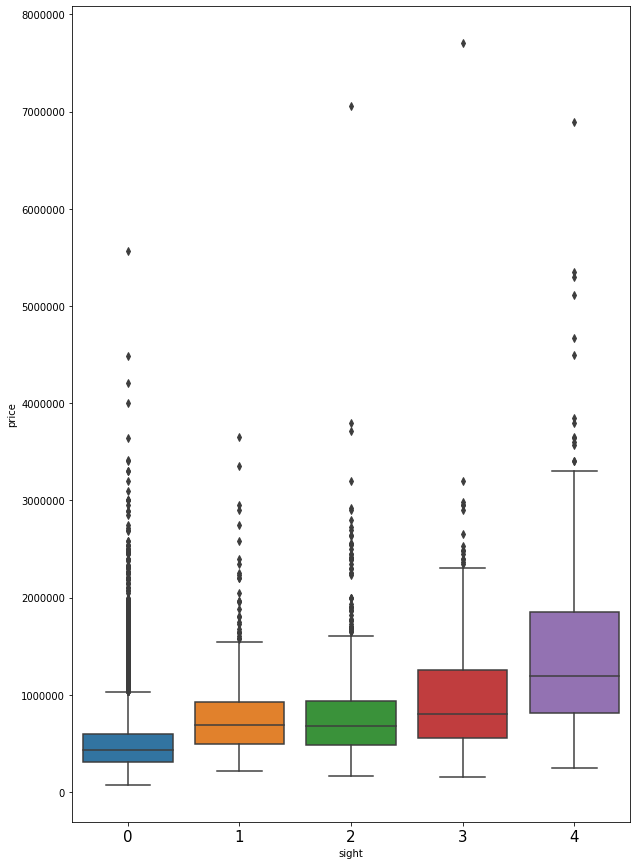

In [35]:
fig,ax = plt.subplots(figsize=(10, 15))
sns.boxplot(x= 'sight',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

In [37]:
df.groupby('condition').describe()['price']

count           mean            std       min       25%  \
condition                                                              
1             30.0  334431.666667  271172.804837   78000.0  160000.0   
2            172.0  327316.215116  245683.980963   80000.0  189750.0   
3          14031.0  542097.086024  364661.792840   75000.0  329500.0   
4           5679.0  521300.705230  358768.811044   89000.0  305000.0   
5           1701.0  612577.742504  411317.859815  110000.0  350000.0   

                50%       75%        max  
condition                                 
1          262500.0  431125.0  1500000.0  
2          279000.0  397300.0  2560000.0  
3          450000.0  640000.0  7060000.0  
4          440000.0  625000.0  7700000.0  
5          526000.0  725000.0  3650000.0

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

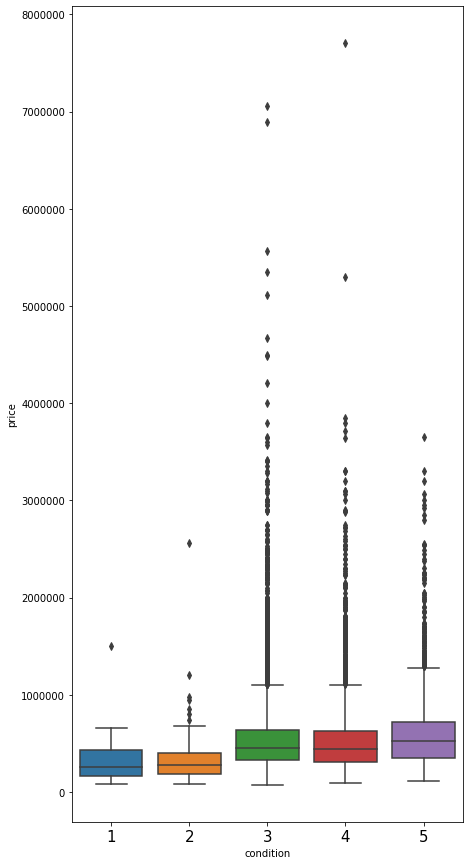

In [43]:
fig,ax = plt.subplots(figsize=(7, 15))
sns.boxplot(x= 'condition',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

In [44]:
df.groupby('quality').describe()['price']

count          mean           std        min        25%        50%  \
quality                                                                        
1           1.0  1.420000e+05           NaN   142000.0   142000.0   142000.0   
3           3.0  2.056667e+05  1.135180e+05    75000.0   168500.0   262000.0   
4          29.0  2.143810e+05  9.430617e+04    80000.0   145000.0   205000.0   
5         242.0  2.485240e+05  1.181003e+05    78000.0   175000.0   228700.0   
6        2038.0  3.019166e+05  1.229522e+05    82000.0   215037.5   275276.5   
7        8981.0  4.025933e+05  1.558953e+05    90000.0   285000.0   375000.0   
8        6068.0  5.428955e+05  2.176132e+05   140000.0   390000.0   510000.0   
9        2615.0  7.737382e+05  3.165221e+05   230000.0   571500.0   720000.0   
10       1134.0  1.072347e+06  4.840508e+05   316000.0   768087.5   914327.0   
11        399.0  1.497792e+06  7.051274e+05   420000.0  1040000.0  1280000.0   
12         90.0  2.192500e+06  1.027337e+06   835000.0  1500000.0  1820000.0   
13         13.0  3.710769e+06  1.859545e+06  1780000.0  2420000.0  2980000.0   

               75%        max  
quality                        
1         142000.0   142000.0  
3         271000.0   280000.0  
4         265000.0   435000.0  
5         295750.0   795000.0  
6         366837.5  1200000.0  
7         485000.0  2050000.0  
8         640000.0  3070000.0  
9         880000.0  2700000.0  
10       1250000.0  3600000.0  
11       1700000.0  7060000.0  
12       2667500.0  5350000.0  
13       3800000.0  7700000.0

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13')]

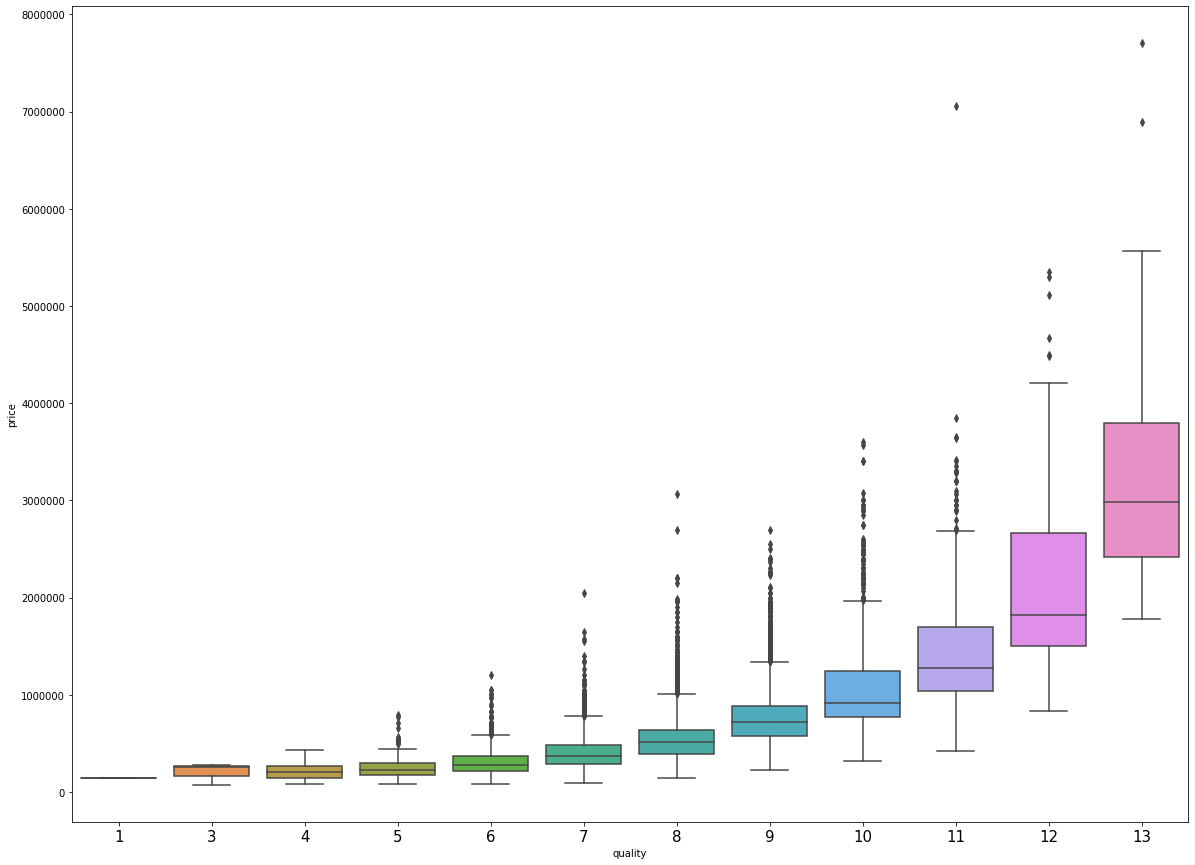

In [40]:
fig,ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x= 'quality',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)

[Text(0, 0, '98001'),
 Text(0, 0, '98002'),
 Text(0, 0, '98003'),
 Text(0, 0, '98004'),
 Text(0, 0, '98005'),
 Text(0, 0, '98006'),
 Text(0, 0, '98007'),
 Text(0, 0, '98008'),
 Text(0, 0, '98010'),
 Text(0, 0, '98011'),
 Text(0, 0, '98014'),
 Text(0, 0, '98019'),
 Text(0, 0, '98022'),
 Text(0, 0, '98023'),
 Text(0, 0, '98024'),
 Text(0, 0, '98027'),
 Text(0, 0, '98028'),
 Text(0, 0, '98029'),
 Text(0, 0, '98030'),
 Text(0, 0, '98031'),
 Text(0, 0, '98032'),
 Text(0, 0, '98033'),
 Text(0, 0, '98034'),
 Text(0, 0, '98038'),
 Text(0, 0, '98039'),
 Text(0, 0, '98040'),
 Text(0, 0, '98042'),
 Text(0, 0, '98045'),
 Text(0, 0, '98052'),
 Text(0, 0, '98053'),
 Text(0, 0, '98055'),
 Text(0, 0, '98056'),
 Text(0, 0, '98058'),
 Text(0, 0, '98059'),
 Text(0, 0, '98065'),
 Text(0, 0, '98070'),
 Text(0, 0, '98072'),
 Text(0, 0, '98074'),
 Text(0, 0, '98075'),
 Text(0, 0, '98077'),
 Text(0, 0, '98092'),
 Text(0, 0, '98102'),
 Text(0, 0, '98103'),
 Text(0, 0, '98105'),
 Text(0, 0, '98106'),
 Text(0, 0

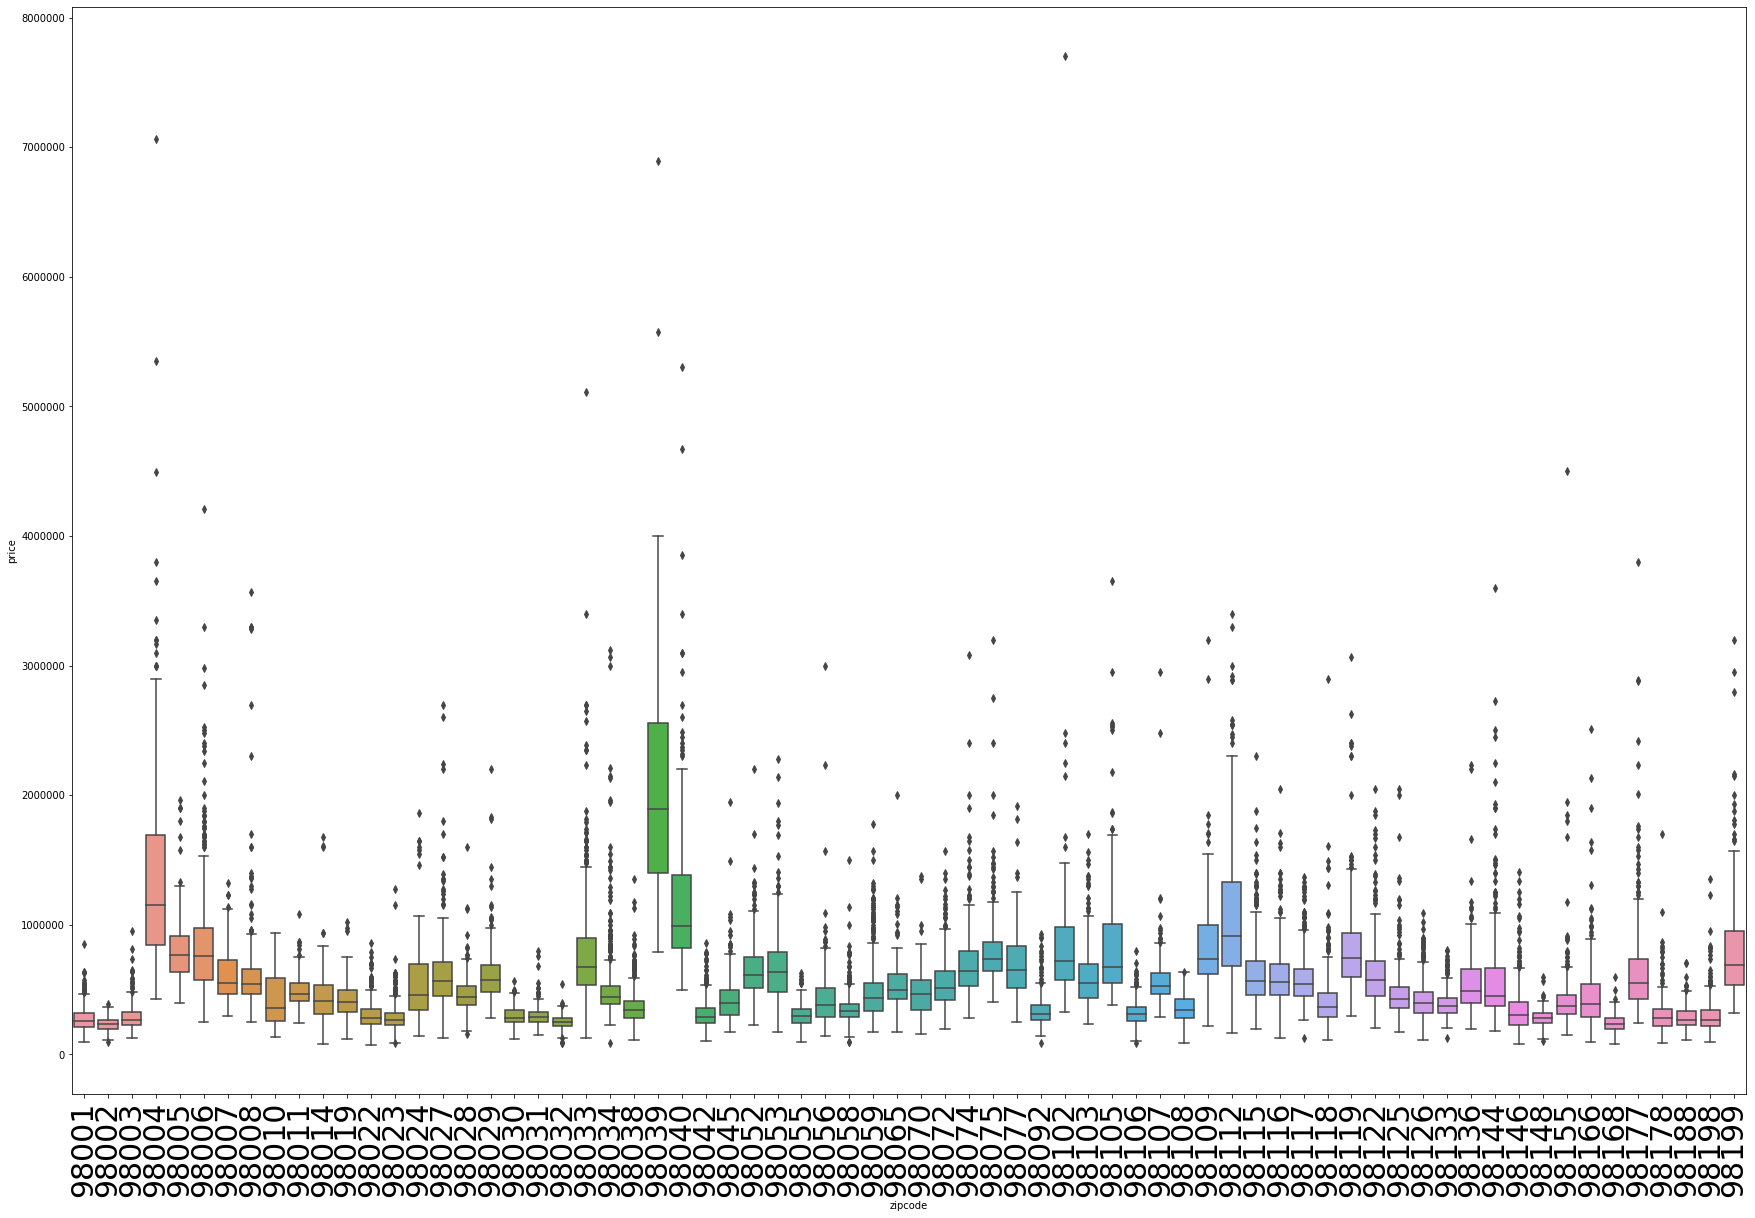

In [3]:
fig,ax = plt.subplots(figsize=(30, 20))
sns.boxplot(x= 'zipcode',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=30)

In [7]:
df.groupby('yr_built').describe()['price']

count           mean            std       min       25%       50%  \
yr_built                                                                      
1900       87.0  581536.632184  294756.372158  130000.0  420000.0  549000.0   
1901       29.0  557108.344828  195369.979938  285000.0  410000.0  550000.0   
1902       27.0  673192.592593  364053.388599  260000.0  446475.0  624000.0   
1903       46.0  480958.195652  203860.965464  167500.0  330000.0  461000.0   
1904       45.0  583867.755556  464115.549669  204995.0  350000.0  478000.0   
...         ...            ...            ...       ...       ...       ...   
2011      130.0  544648.384615  316024.697823  249000.0  359875.0  440000.0   
2012      170.0  527436.982353  280522.303238  160797.0  333472.0  448475.0   
2013      201.0  678599.582090  447055.316738  155000.0  380000.0  565000.0   
2014      559.0  683792.685152  374463.432651  175003.0  429900.0  599000.0   
2015       38.0  759970.947368  421467.055816  230000.0  500000.0  629500.0   

                75%        max  
yr_built                        
1900      715250.00  1700000.0  
1901      625000.00  1230000.0  
1902      766125.00  1990000.0  
1903      576758.75  1020000.0  
1904      687500.00  3300000.0  
...             ...        ...  
2011      664000.00  2580000.0  
2012      643722.00  2000000.0  
2013      799900.00  3000000.0  
2014      842970.00  3420000.0  
2015      794960.00  2000000.0  

[116 rows x 8 columns]

[Text(0, 0, '1900'),
 Text(0, 0, '1901'),
 Text(0, 0, '1902'),
 Text(0, 0, '1903'),
 Text(0, 0, '1904'),
 Text(0, 0, '1905'),
 Text(0, 0, '1906'),
 Text(0, 0, '1907'),
 Text(0, 0, '1908'),
 Text(0, 0, '1909'),
 Text(0, 0, '1910'),
 Text(0, 0, '1911'),
 Text(0, 0, '1912'),
 Text(0, 0, '1913'),
 Text(0, 0, '1914'),
 Text(0, 0, '1915'),
 Text(0, 0, '1916'),
 Text(0, 0, '1917'),
 Text(0, 0, '1918'),
 Text(0, 0, '1919'),
 Text(0, 0, '1920'),
 Text(0, 0, '1921'),
 Text(0, 0, '1922'),
 Text(0, 0, '1923'),
 Text(0, 0, '1924'),
 Text(0, 0, '1925'),
 Text(0, 0, '1926'),
 Text(0, 0, '1927'),
 Text(0, 0, '1928'),
 Text(0, 0, '1929'),
 Text(0, 0, '1930'),
 Text(0, 0, '1931'),
 Text(0, 0, '1932'),
 Text(0, 0, '1933'),
 Text(0, 0, '1934'),
 Text(0, 0, '1935'),
 Text(0, 0, '1936'),
 Text(0, 0, '1937'),
 Text(0, 0, '1938'),
 Text(0, 0, '1939'),
 Text(0, 0, '1940'),
 Text(0, 0, '1941'),
 Text(0, 0, '1942'),
 Text(0, 0, '1943'),
 Text(0, 0, '1944'),
 Text(0, 0, '1945'),
 Text(0, 0, '1946'),
 Text(0, 0, '

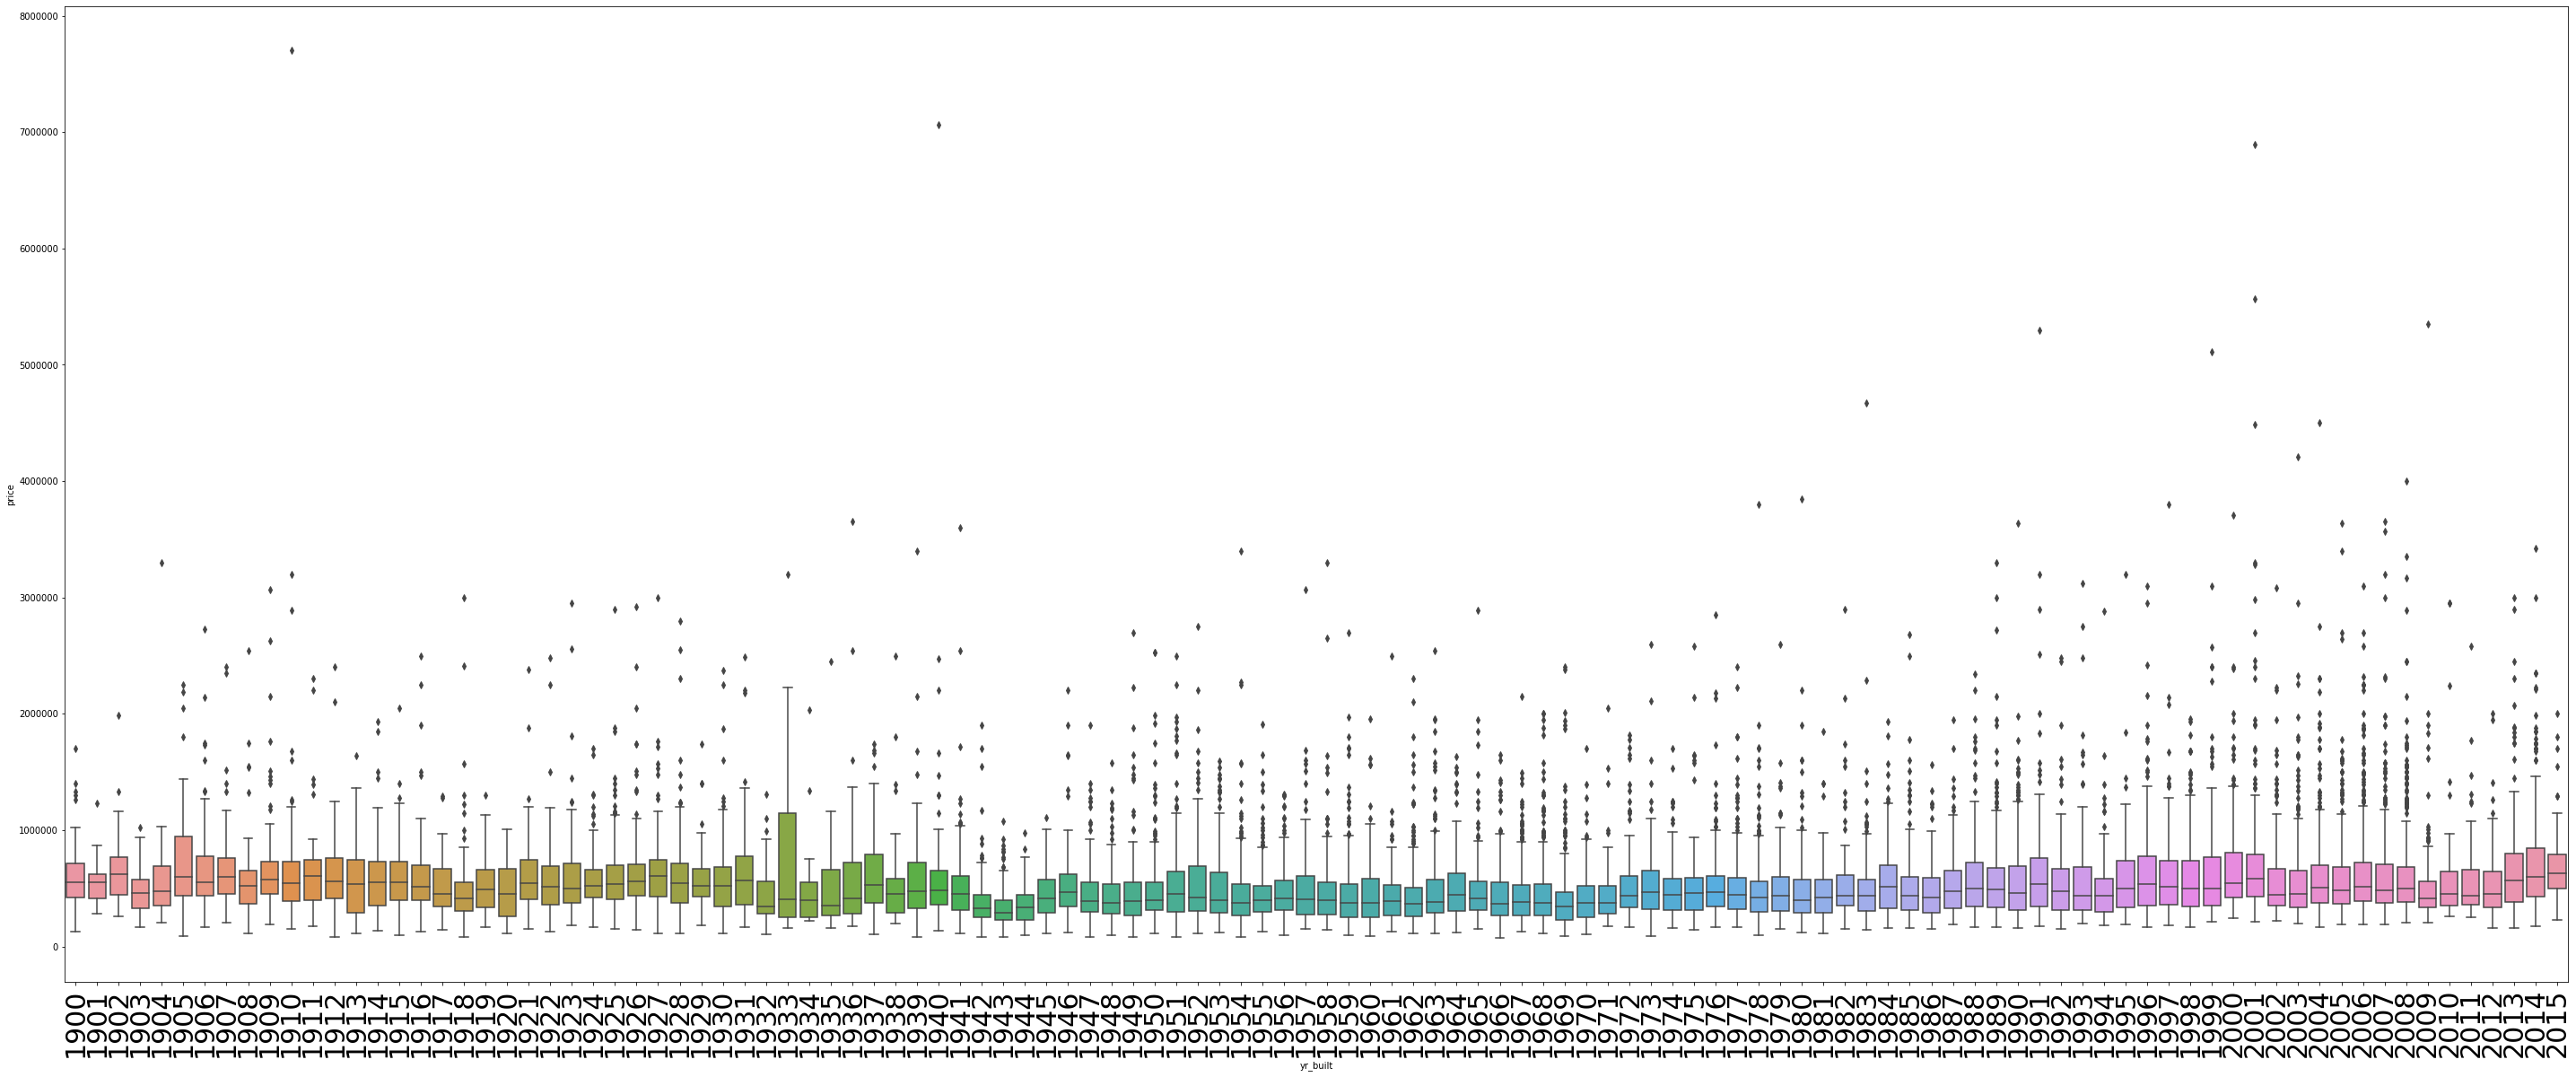

In [6]:
fig,ax = plt.subplots(figsize=(50, 20))
sns.boxplot(x= 'yr_built',y = 'price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=30)

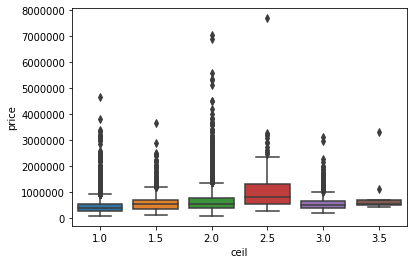

In [9]:
sns.boxplot(x= 'ceil',y = 'price',data = df)

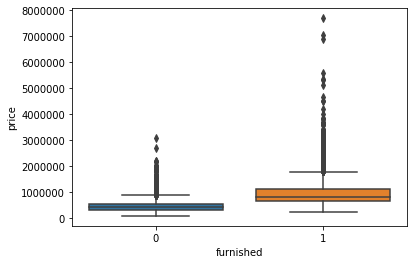

In [66]:
sns.boxplot(x= 'furnished',y = 'price',data = df)

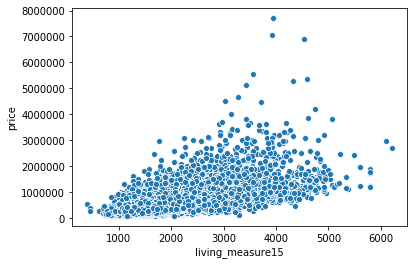

In [59]:
sns.scatterplot(df["living_measure15"], df["price"])

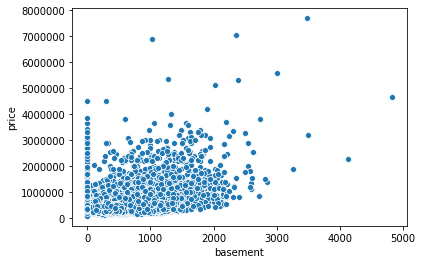

In [61]:
sns.scatterplot(df["basement"], df["price"])

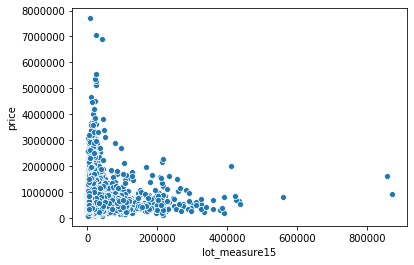

In [60]:
sns.scatterplot(df["lot_measure15"], df["price"])

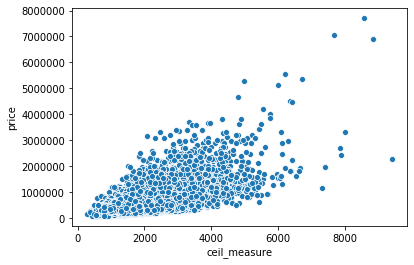

In [14]:
sns.scatterplot(df["ceil_measure"], df["price"])

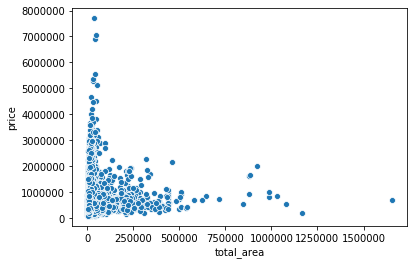

In [18]:
sns.scatterplot(df["total_area"], df["price"])

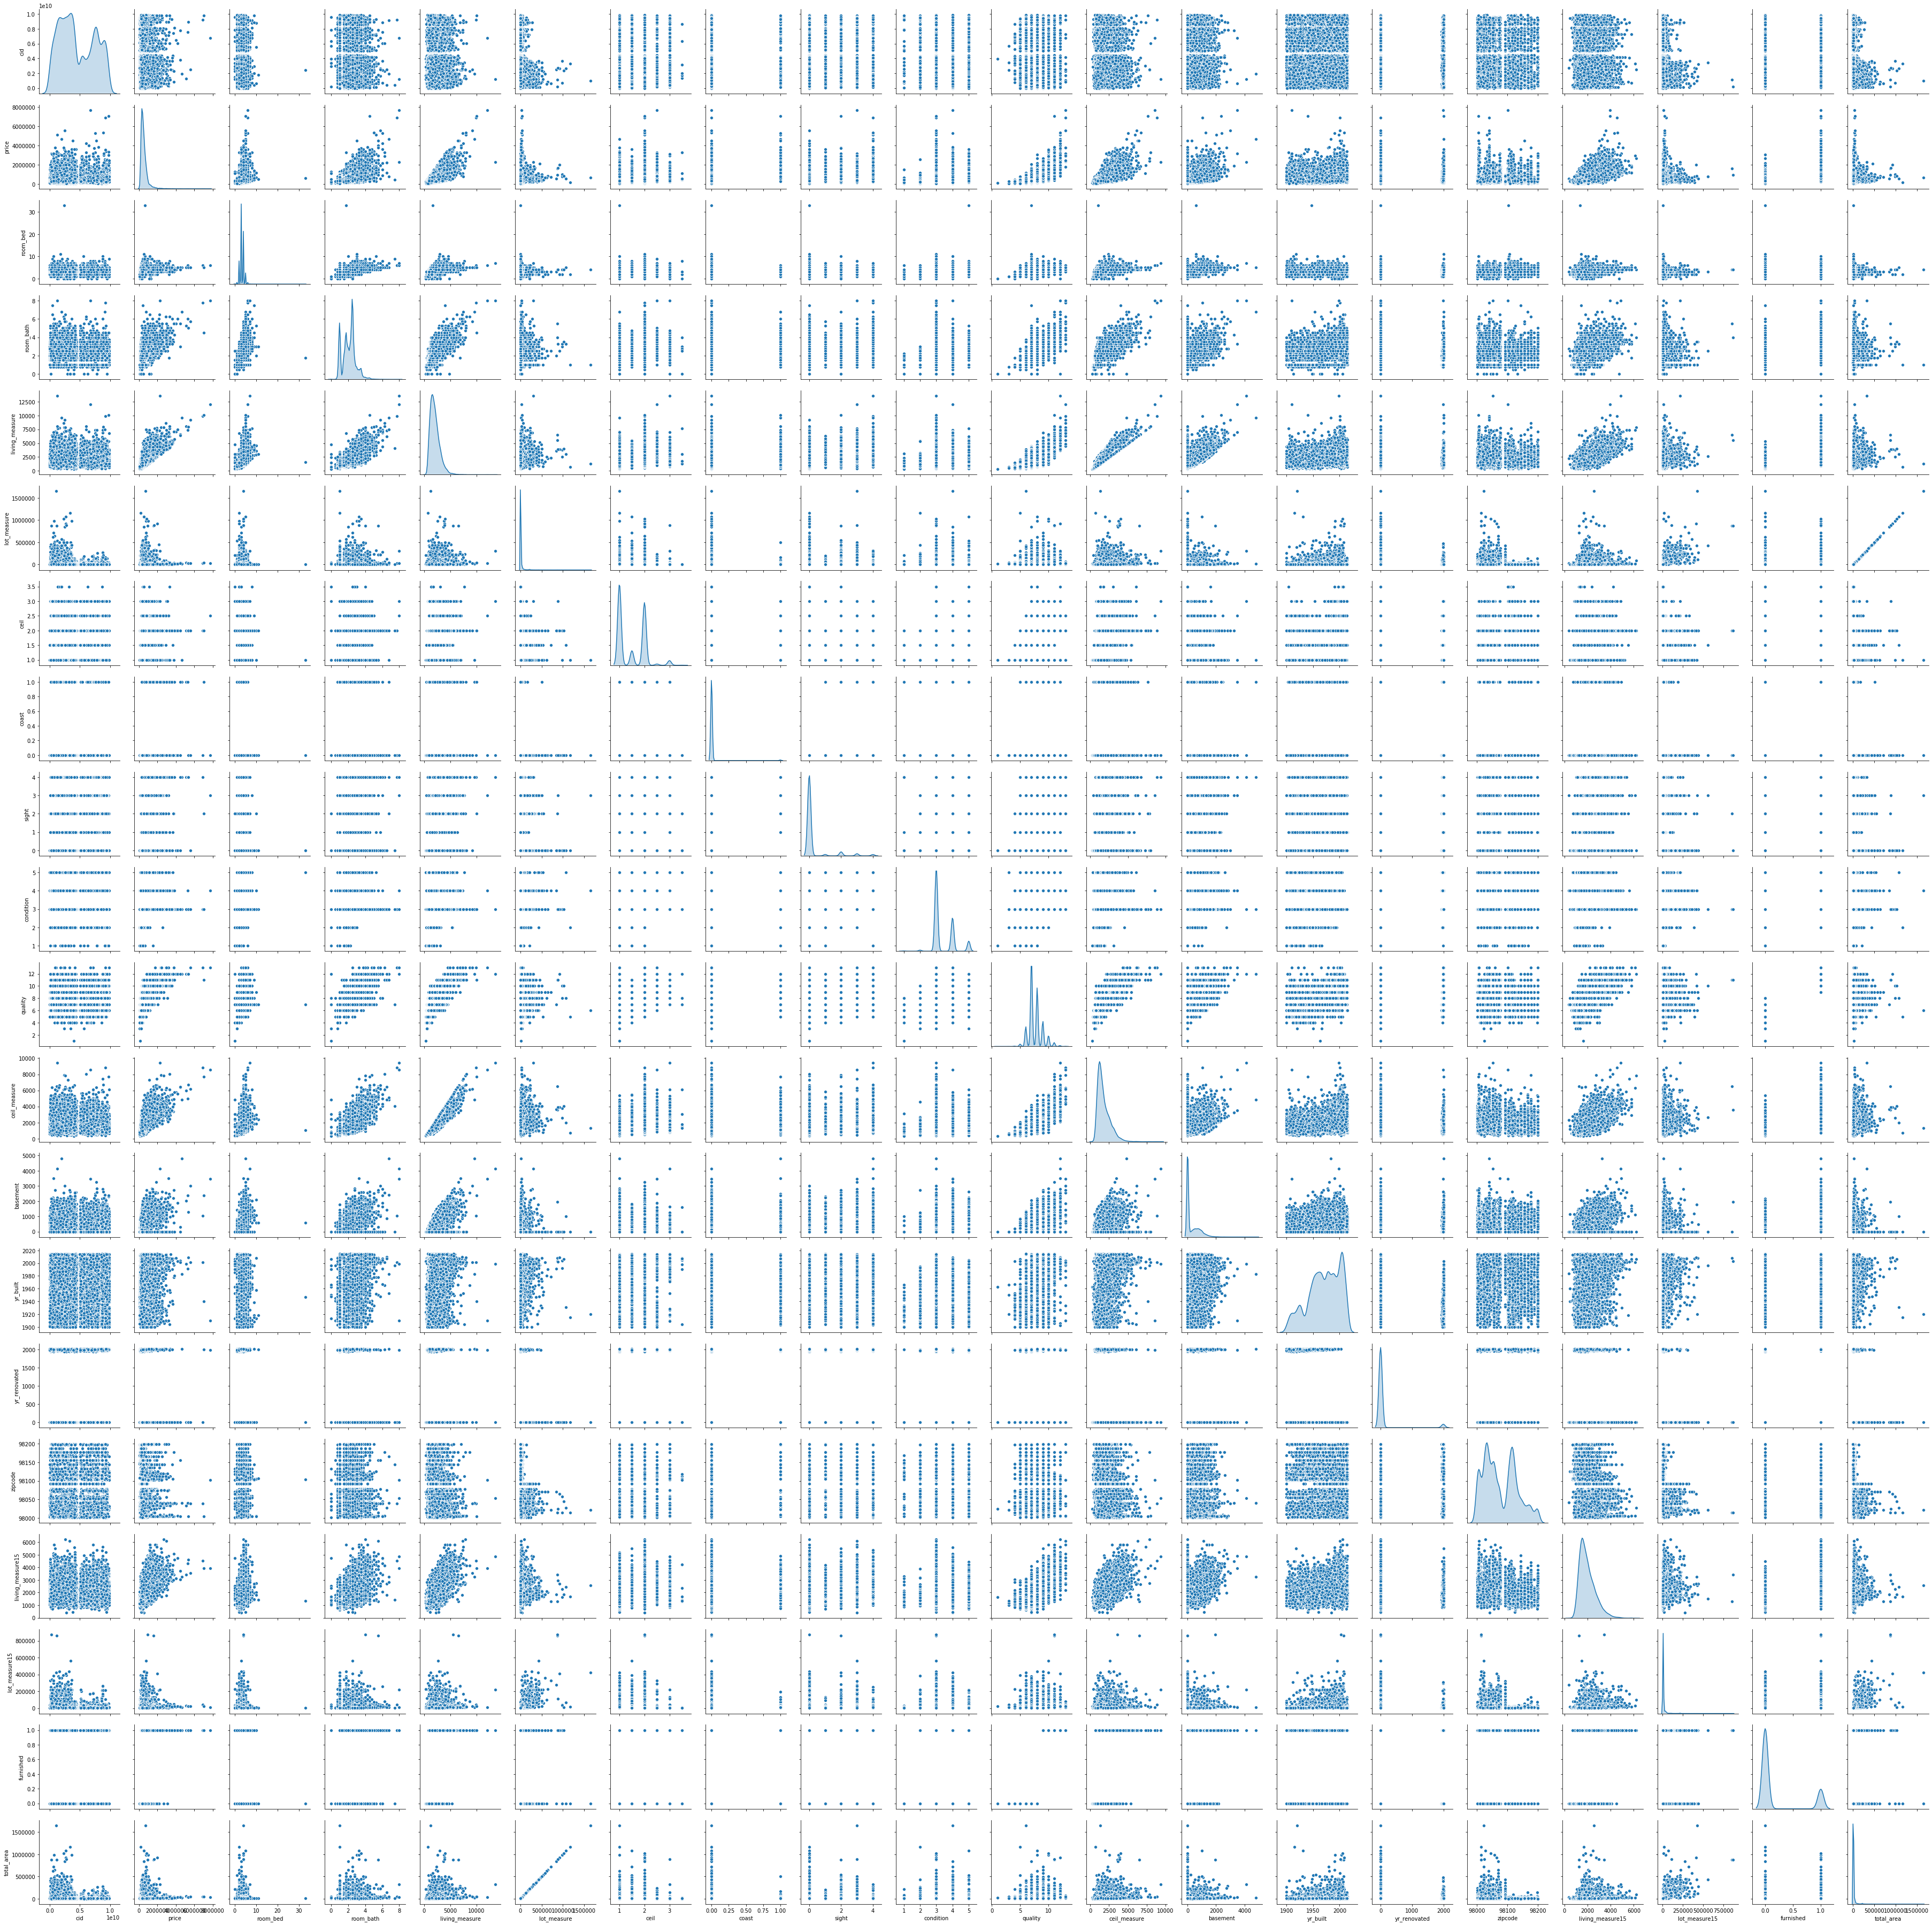

In [13]:
sns.pairplot(df, diag_kind='kde')

In [8]:
df.corr()

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001286   0.005160       -0.012258   
price            -0.016797  1.000000  0.308338   0.525134        0.702044   
room_bed          0.001286  0.308338  1.000000   0.515884        0.576671   
room_bath         0.005160  0.525134  0.515884   1.000000        0.754665   
living_measure   -0.012258  0.702044  0.576671   0.754665        1.000000   
lot_measure      -0.132109  0.089655  0.031703   0.087740        0.172826   
ceil              0.018525  0.256786  0.175429   0.500653        0.353949   
coast            -0.002721  0.266331 -0.006582   0.063744        0.103818   
sight             0.011592  0.397346  0.079532   0.187737        0.284611   
condition        -0.023783  0.036392  0.028472  -0.124982       -0.058753   
quality           0.008130  0.667463  0.356967   0.664983        0.762704   
ceil_measure     -0.010842  0.605566  0.477600   0.685342        0.876597   
basement         -0.005151  0.323837  0.303093   0.283770        0.435043   
yr_built          0.021380  0.053982  0.154178   0.506019        0.318049   
yr_renovated     -0.016907  0.126442  0.018841   0.050739        0.055363   
zipcode          -0.008224 -0.053168 -0.152668  -0.203866       -0.199430   
lat              -0.001891  0.306919 -0.008931   0.024573        0.052529   
long              0.020799  0.021571  0.129473   0.223042        0.240223   
living_measure15 -0.002901  0.585374  0.391638   0.568634        0.756420   
lot_measure15    -0.138798  0.082456  0.029244   0.087175        0.183286   
furnished        -0.010009  0.565991  0.259268   0.484923        0.632947   
total_area       -0.131844  0.104796  0.044310   0.104050        0.194209   

                  lot_measure      ceil     coast     sight  condition  ...  \
cid                 -0.132109  0.018525 -0.002721  0.011592  -0.023783  ...   
price                0.089655  0.256786  0.266331  0.397346   0.036392  ...   
room_bed             0.031703  0.175429 -0.006582  0.079532   0.028472  ...   
room_bath            0.087740  0.500653  0.063744  0.187737  -0.124982  ...   
living_measure       0.172826  0.353949  0.103818  0.284611  -0.058753  ...   
lot_measure          1.000000 -0.005201  0.021604  0.074710  -0.008958  ...   
ceil                -0.005201  1.000000  0.023698  0.029444  -0.263768  ...   
coast                0.021604  0.023698  1.000000  0.401857   0.016653  ...   
sight                0.074710  0.029444  0.401857  1.000000   0.045990  ...   
condition           -0.008958 -0.263768  0.016653  0.045990   1.000000  ...   
quality              0.113621  0.458183  0.082775  0.251321  -0.144674  ...   
ceil_measure         0.183512  0.523885  0.072075  0.167649  -0.158214  ...   
basement             0.015286 -0.245705  0.080588  0.276947   0.174105  ...   
yr_built             0.053080  0.489319 -0.026161 -0.053440  -0.361417  ...   
yr_renovated         0.007644  0.006338  0.092885  0.103917  -0.060618  ...   
zipcode             -0.129574 -0.059121  0.030285  0.084827   0.003026  ...   
lat                 -0.085683  0.049614 -0.014274  0.006157  -0.014941  ...   
long                 0.229521  0.125419 -0.041910 -0.078400  -0.106500  ...   
living_measure15     0.144608  0.279885  0.086463  0.280439  -0.092824  ...   
lot_measure15        0.718557 -0.011269  0.030703  0.072575  -0.003406  ...   
furnished            0.118883  0.347749  0.069882  0.220250  -0.121902  ...   
total_area           0.999763  0.002637  0.023809  0.080693  -0.010219  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
cid              -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
price             0.323837  0.053982      0.126442 -0.053168  0.306919   
room_bed          0.303093  0.154178      0.018841 -0.152668 -0.008931   
room_bath         0.283770  0.506019      0.050739 -0.203866  0.024573   
living_measure    0.435043  0.318049      0.055363 -0.199430  0

In [8]:
renovated.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
13  7443000480  20150507T000000  865000         4       2.00            2750   
20  8820900029  20140610T000000  700000         5       2.75            3100   
35  9187200275  20150420T000000  905000         4       2.25            2240   
52   254000545  20141023T000000  385000         4       2.50            1620   
53  3438501452  20140520T000000  329000         4       2.50            1600   

    lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
13         5527   2.0      0      0  ...       620      1901          1987   
20         9825   2.0      0      2  ...         0      1950          1982   
35         5000   2.0      0      0  ...       470      1900          2014   
52         5280   2.0      0      0  ...         0      1924          1971   
53         6765   1.0      0      0  ...       770      1947          2011   

    zipcode      lat     long  living_measure15  lot_measure15  furnished  \
13    98119  47.6513 -122.368              1290           1764          0   
20    98125  47.7188 -122.281              2120           8400          0   
35    98122  47.6027 -122.295              2120           5000          0   
52    98146  47.5132 -122.384              1590           5280          0   
53    98106  47.5469 -122.365              1600           8942          0   

    total_area  
13        8277  
20       12925  
35        7240  
52        6900  
53        8365  

[5 rows x 23 columns]

In [103]:
df.head(25)

cid         dayhours   price  room_bed  room_bath  living_measure  \
0   3034200666  20141107T000000  808100         4       3.25            3020   
1   8731981640  20141204T000000  277500         4       2.50            2550   
2   5104530220  20150420T000000  404000         3       2.50            2370   
3   6145600285  20140529T000000  300000         2       1.00             820   
4   8924100111  20150424T000000  699000         2       1.50            1400   
5   5525400430  20140715T000000  585000         3       2.50            2050   
6   2419600075  20141201T000000  465000         3       1.75            1480   
7    114101161  20140829T000000  480000         3       1.50            2100   
8   7011201550  20140707T000000  780000         4       2.00            2600   
9   7203000640  20140918T000000  215000         4       1.00            1130   
10  7518503685  20141009T000000  402000         2       1.00             710   
11  7300400150  20141027T000000  299000         4       2.50            2350   
12  2215800050  20150415T000000  785000         4       2.50            3440   
13  7443000480  20150507T000000  865000         4       2.00            2750   
14  5072100095  20141117T000000  554000         5       2.50            3440   
15  1387301730  20150202T000000  361000         3       1.50            1200   
16  1310430130  20141009T000000  459000         4       2.75            2790   
17  3352400351  20141121T000000  200000         3       1.00            1480   
18  3678900110  20140610T000000  403000         2       1.00            1100   
19  2474400250  20140630T000000  327500         3       2.25            2310   
20  8820900029  20140610T000000  700000         5       2.75            3100   
21   263000050  20141031T000000  730000         3       2.50            2160   
22  9406500350  20141229T000000  207000         2       1.50            1068   
23  9533100145  20150205T000000  750000         3       1.00            1120   
24  5694500105  20141204T000000  595000         2       2.00            1510   

    lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
0         13457   1.0      0      0  ...      1956             0    98133   
1          7500   1.0      0      0  ...      1976             0    98023   
2          4324   2.0      0      0  ...      2006             0    98038   
3          3844   1.0      0      0  ...      1916             0    98133   
4          4050   1.0      0      0  ...      1954             0    98115   
5         11690   2.0      0      0  ...      1989             0    98059   
6          6360   1.0      0      0  ...      1954             0    98133   
7         67269   1.0      0      0  ...      1949             0    98028   
8          4800   1.0      0      2  ...      1953             0    98119   
9          7400   1.0      0      0  ...      1969             0    98003   
10         5100   1.0      0      0  ...      1905             0    98117   
11         6958   2.0      0      0  ...      1998             0    98092   
12        56192   2.0      0      0  ...      1994             0    98053   
13         5527   2.0      0      0  ...      1901          1987    98119   
14        12900   1.0      0      2  ...      1958             0    98166   
15         7236   1.0      0      0  ...      1975             0    98011   
16         6600   2.0      0      0  ...      2000             0    98058   
17         5600   1.0      0      0  ...      1947             0    98178   
18         3598   1.0      0      0  ...      1926             0    98144   
19         7200   2.0      0      0  ...      1990             0    98031   
20         9825   2.0      0      2  ...      1950          1982    98125   
21         8809   1.0      0      0  ...      2014             0    98103   
22         1158   2.0      0      0  ...      1990             0    98028   
23         8549   1.0      0      0  ...      1952             0    98004   
24   

# Feature Engineering

In [3]:
df.drop(df[ df['room_bed'] == 33 ].index ,axis =0,inplace = True)

In [4]:
df[df['room_bed']==33]

Empty DataFrame
Columns: [cid, dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

[0 rows x 23 columns]

In [5]:
df.drop(['cid','dayhours','lat','long','living_measure','lot_measure'],axis = 1,inplace = True)

In [6]:
df.head()

price  room_bed  room_bath  ceil  coast  sight  condition  quality  \
0  808100         4       3.25   1.0      0      0          5        9   
1  277500         4       2.50   1.0      0      0          3        8   
2  404000         3       2.50   2.0      0      0          3        8   
3  300000         2       1.00   1.0      0      0          4        6   
4  699000         2       1.50   1.0      0      0          4        8   

   ceil_measure  basement  yr_built  yr_renovated  zipcode  living_measure15  \
0          3020         0      1956             0    98133              2120   
1          1750       800      1976             0    98023              2260   
2          2370         0      2006             0    98038              2370   
3           820         0      1916             0    98133              1520   
4          1400         0      1954             0    98115              1900   

   lot_measure15  furnished  total_area  
0           7553          1       16477  
1           8800          0       10050  
2           4348          0        6694  
3           3844          0        4664  
4           5940          0        5450

In [7]:
df['built'] = 2015 - df['yr_built'] 

In [8]:
df['yr_renovated'] = np.where(df['yr_renovated']==0, df['yr_built']  , df['yr_renovated'])

In [9]:
df.head()

price  room_bed  room_bath  ceil  coast  sight  condition  quality  \
0  808100         4       3.25   1.0      0      0          5        9   
1  277500         4       2.50   1.0      0      0          3        8   
2  404000         3       2.50   2.0      0      0          3        8   
3  300000         2       1.00   1.0      0      0          4        6   
4  699000         2       1.50   1.0      0      0          4        8   

   ceil_measure  basement  yr_built  yr_renovated  zipcode  living_measure15  \
0          3020         0      1956          1956    98133              2120   
1          1750       800      1976          1976    98023              2260   
2          2370         0      2006          2006    98038              2370   
3           820         0      1916          1916    98133              1520   
4          1400         0      1954          1954    98115              1900   

   lot_measure15  furnished  total_area  built  
0           7553          1       16477     59  
1           8800          0       10050     39  
2           4348          0        6694      9  
3           3844          0        4664     99  
4           5940          0        5450     61

In [10]:
df['renovated'] = 2015 -  df['yr_renovated']  

In [11]:
df.head(25)

price  room_bed  room_bath  ceil  coast  sight  condition  quality  \
0   808100         4       3.25   1.0      0      0          5        9   
1   277500         4       2.50   1.0      0      0          3        8   
2   404000         3       2.50   2.0      0      0          3        8   
3   300000         2       1.00   1.0      0      0          4        6   
4   699000         2       1.50   1.0      0      0          4        8   
5   585000         3       2.50   2.0      0      0          4        9   
6   465000         3       1.75   1.0      0      0          3        7   
7   480000         3       1.50   1.0      0      0          4        7   
8   780000         4       2.00   1.0      0      2          3        8   
9   215000         4       1.00   1.0      0      0          4        7   
10  402000         2       1.00   1.0      0      0          5        7   
11  299000         4       2.50   2.0      0      0          3        9   
12  785000         4       2.50   2.0      0      0          3        9   
13  865000         4       2.00   2.0      0      0          3        8   
14  554000         5       2.50   1.0      0      2          4        8   
15  361000         3       1.50   1.0      0      0          3        7   
16  459000         4       2.75   2.0      0      0          3        9   
17  200000         3       1.00   1.0      0      0          4        6   
18  403000         2       1.00   1.0      0      0          4        7   
19  327500         3       2.25   2.0      0      0          3        8   
20  700000         5       2.75   2.0      0      2          4        8   
21  730000         3       2.50   1.0      0      0          3        9   
22  207000         2       1.50   2.0      0      0          3        7   
23  750000         3       1.00   1.0      0      0          3        7   
24  595000         2       2.00   1.0      0      0          4        7   

    ceil_measure  basement  yr_built  yr_renovated  zipcode  living_measure15  \
0           3020         0      1956          1956    98133              2120   
1           1750       800      1976          1976    98023              2260   
2           2370         0      2006          2006    98038              2370   
3            820         0      1916          1916    98133              1520   
4           1400         0      1954          1954    98115              1900   
5           2050         0      1989          1989    98059              2410   
6           1480         0      1954          1954    98133              1480   
7           1220       880      1949          1949    98028              1610   
8           1400      1200      1953          1953    98119              2050   
9           1130         0      1969          1969    98003              1540   
10           710         0      1905          1905    98117              1530   
11          2350         0      1998          1998    98092              2480   
12          3440         0      1994          1994    98053              3150   
13          2130       620      1901          1987    98119              1290   
14          1720      1720      1958          1958    98166              2100   
15          1200         0      1975          1975    98011              1680   
16          2790         0      2000          2000    98058              2900   
17           940       540      1947          1947    98178              1350   
18          1100         0      1926          1926    98144              1240   
19          2310         0      1990          1990    98031              1960   
20          3100         0      1950          1982    98125              2120   
21          1540       620      2014          2014    98103               930   
22          1068         0      1990          1990    98028              1078   
23          1120         0      1952          1952    98004              1440   
24          1010       500   

In [12]:
df.shape

(21612, 19)

In [13]:
df.drop(['yr_built','yr_renovated'],axis = 1,inplace = True)

In [14]:
df.shape

(21612, 17)

In [15]:
df.head()

price  room_bed  room_bath  ceil  coast  sight  condition  quality  \
0  808100         4       3.25   1.0      0      0          5        9   
1  277500         4       2.50   1.0      0      0          3        8   
2  404000         3       2.50   2.0      0      0          3        8   
3  300000         2       1.00   1.0      0      0          4        6   
4  699000         2       1.50   1.0      0      0          4        8   

   ceil_measure  basement  zipcode  living_measure15  lot_measure15  \
0          3020         0    98133              2120           7553   
1          1750       800    98023              2260           8800   
2          2370         0    98038              2370           4348   
3           820         0    98133              1520           3844   
4          1400         0    98115              1900           5940   

   furnished  total_area  built  renovated  
0          1       16477     59         59  
1          0       10050     39         39  
2          0        6694      9          9  
3          0        4664     99         99  
4          0        5450     61         61

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [17]:
train_df=pd.DataFrame(train)
train_df.columns = df.columns

test_df=pd.DataFrame(test)
test_df.columns = df.columns

In [18]:
train_df ['price_per_total_area'] = train_df ['price'] / train_df ['total_area']

In [19]:
median_price_zip  = pd.DataFrame(train_df.groupby('zipcode').median()['price_per_total_area'])

In [20]:
median_price_zip.head()

price_per_total_area
zipcode                      
98001               22.518160
98002               25.482035
98003               25.239044
98004               79.021471
98005               46.234253

In [21]:
median_price_zip['Locality Status'] = pd.qcut(median_price_zip['price_per_total_area'],12,labels = False,duplicates = 'drop')

In [22]:
median_price_zip.head()

price_per_total_area  Locality Status
zipcode                                       
98001               22.518160                1
98002               25.482035                2
98003               25.239044                1
98004               79.021471                9
98005               46.234253                6

In [23]:
median_price_zip.drop('price_per_total_area',axis =1,inplace = True)
median_price_zip.head()

Locality Status
zipcode                 
98001                  1
98002                  2
98003                  1
98004                  9
98005                  6

In [24]:
train_df = pd.merge(train_df,median_price_zip,on='zipcode',how ='left')

In [25]:
train_df.drop('price_per_total_area',axis =1,inplace = True)


In [26]:
train_df.drop('zipcode',axis =1,inplace = True)

In [27]:
train_df.head()

price  room_bed  room_bath  ceil  coast  sight  condition  quality  \
0  225000         3       1.00   1.0      0      0          3        6   
1  450000         5       2.50   1.0      0      0          4        8   
2  485000         3       1.75   1.0      0      2          3        8   
3  340000         4       2.50   2.0      0      0          3        8   
4  330000         4       2.50   2.0      0      0          3        9   

   ceil_measure  basement  living_measure15  lot_measure15  furnished  \
0          1790         0               830           6120          0   
1          1410      1100              2170          10500          0   
2          1790         0              1310           6028          0   
3          2170         0              2280           8616          0   
4          2340         0              2250          10760          1   

   total_area  built  renovated  Locality Status  
0        7910     78         51                4  
1       12750     31         31                5  
2        8565     64         64                8  
3       21955     23         23                3  
4       14124     18         18                3

In [28]:
test_df = pd.merge(test_df,median_price_zip,on='zipcode',how ='left')

In [29]:
test_df.isnull().sum()

price               0
room_bed            0
room_bath           0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
zipcode             0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
built               0
renovated           0
Locality Status     0
dtype: int64

In [30]:
test_df.drop('zipcode',axis =1,inplace = True)

In [31]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing  
from sklearn.preprocessing import StandardScaler

In [32]:
train_df_std = pd.DataFrame(StandardScaler().fit_transform(train_df))
train_df_std.columns = train_df.columns

test_df_std = pd.DataFrame(StandardScaler().fit_transform(test_df))
test_df_std.columns = test_df.columns

In [33]:
train_df_std.head()

price  room_bed  room_bath      ceil     coast     sight  condition  \
0 -0.852353 -0.410940  -1.447005 -0.919351 -0.086703 -0.306001  -0.633011   
1 -0.242824  1.779854   0.495656 -0.919351 -0.086703 -0.306001   0.896994   
2 -0.148009 -0.410940  -0.475674 -0.919351 -0.086703  2.299489  -0.633011   
3 -0.540816  0.684457   0.495656  0.936851 -0.086703 -0.306001  -0.633011   
4 -0.567906  0.684457   0.495656  0.936851 -0.086703 -0.306001  -0.633011   

    quality  ceil_measure  basement  living_measure15  lot_measure15  \
0 -1.408325     -0.005334 -0.652766         -1.690963      -0.247340   
1  0.292229     -0.461581  1.831245          0.264606      -0.083530   
2  0.292229     -0.005334 -0.652766         -0.990460      -0.250781   
3  0.292229      0.450914 -0.652766          0.425137      -0.153991   
4  1.142506      0.655024 -0.652766          0.381356      -0.073806   

   furnished  total_area     built  renovated  Locality Status  
0  -0.496581   -0.223279  1.158905   0.325996        -0.578233  
1  -0.496581   -0.106592 -0.441175  -0.368128        -0.259398  
2  -0.496581   -0.207487  0.682285   0.777176         0.697107  
3  -0.496581    0.115328 -0.713530  -0.645777        -0.897068  
4   2.013768   -0.073467 -0.883751  -0.819308        -0.897068

In [34]:
train_df_std.corr()

price  room_bed  room_bath      ceil     coast     sight  \
price             1.000000  0.310953   0.525706  0.259958  0.274072  0.399256   
room_bed          0.310953  1.000000   0.529753  0.184767 -0.007653  0.081096   
room_bath         0.525706  0.529753   1.000000  0.501533  0.065172  0.190511   
ceil              0.259958  0.184767   0.501533  1.000000  0.020720  0.031980   
coast             0.274072 -0.007653   0.065172  0.020720  1.000000  0.397259   
sight             0.399256  0.081096   0.190511  0.031980  0.397259  1.000000   
condition         0.037485  0.030491  -0.123344 -0.264186  0.016072  0.048517   
quality           0.664526  0.363805   0.665371  0.464064  0.087058  0.253312   
ceil_measure      0.606040  0.490858   0.688322  0.525758  0.070662  0.169529   
basement          0.320802  0.308509   0.282740 -0.243593  0.089020  0.285705   
living_measure15  0.583386  0.401658   0.574169  0.286467  0.087106  0.282268   
lot_measure15     0.086822  0.027796   0.087564 -0.010422  0.030933  0.071675   
furnished         0.562972  0.261158   0.484533  0.351351  0.075053  0.225037   
total_area        0.105393  0.040244   0.099595  0.003275  0.026834  0.082174   
built            -0.052917 -0.156356  -0.505844 -0.488880  0.017992  0.050290   
renovated        -0.103488 -0.164109  -0.534989 -0.503280 -0.003319  0.015108   
Locality Status   0.403561 -0.019168   0.068248  0.173956 -0.026777  0.060375   

                  condition   quality  ceil_measure  basement  \
price              0.037485  0.664526      0.606040  0.320802   
room_bed           0.030491  0.363805      0.490858  0.308509   
room_bath         -0.123344  0.665371      0.688322  0.282740   
ceil              -0.264186  0.464064      0.525758 -0.243593   
coast              0.016072  0.087058      0.070662  0.089020   
sight              0.048517  0.253312      0.169529  0.285705   
condition          1.000000 -0.146249     -0.158951  0.179624   
quality           -0.146249  1.000000      0.754790  0.164709   
ceil_measure      -0.158951  0.754790      1.000000 -0.048687   
basement           0.179624  0.164709     -0.048687  1.000000   
living_measure15  -0.091504  0.713757      0.733976  0.197531   
lot_measure15      0.001639  0.120290      0.200670  0.006587   
furnished         -0.123065  0.788587      0.650371  0.088409   
total_area        -0.003717  0.122771      0.198785  0.016139   
built              0.366375 -0.449210     -0.422414  0.134609   
renovated          0.399252 -0.462124     -0.434391  0.105336   
Locality Status    0.025238  0.148404     -0.022335  0.140214   

                  living_measure15  lot_measure15  furnished  total_area  \
price                     0.583386       0.086822   0.562972    0.105393   
room_bed                  0.401658       0.027796   0.261158    0.040244   
room_bath                 0.574169       0.087564   0.484533    0.099595   
ceil                      0.286467      -0.010422   0.351351    0.003275   
coast                     0.087106       0.030933   0.075053    0.026834   
sight                     0.282268       0.071675   0.225037    0.082174   
condition                -0.091504       0.001639  -0.123065   -0.003717   
quality                   0.713757       0.120290   0.788587    0.122771   
ceil_measure              0.733976       0.200670   0.650371    0.198785   
basement                  0.197531       0.006587   0.088409    0.016139   
living_measure15          1.000000       0.182911   0.619881    0.158893   
lot_measure15             0.182911       1.000000   0.129791    0.728667   
furnished                 0.619881       0.129791   1.000000    0.126265   
total_area                0.158893       0.728667   0.126265    1.000000   
built                    -0.326596      -0.072382  -0.307469   -0.054818   
renovated                -0.324614      -0.071732  -0.317667   -0.054896   
Locality Status           0.022297      -0.237068   0.104050   -0.202406   

                     b

In [35]:
x_train = train_df_std.drop(labels = 'price' , axis =1)
y_train = train_df_std['price']

In [36]:
x_test = test_df_std.drop(labels = 'price' , axis =1)
y_test = test_df_std['price']

## Feature Engneering using PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32027722, 0.45431321, 0.56938697, 0.6483489 , 0.71832912,
       0.77276868, 0.82055612, 0.86408579, 0.89715581, 0.92084143,
       0.94209734, 0.95991087, 0.97585389, 0.98612875, 0.99445773,
       1.        ])

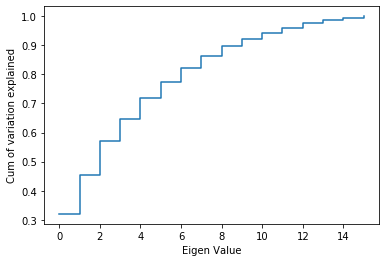

In [39]:
plt.step(list(range(0,16)),np.cumsum(pca.explained_variance_ratio_), where='post')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

# Model Building

## Linear Regression - Simple 

In [42]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for room_bed is -0.0748953713601711
The coefficient for room_bath is 0.05118658654069219
The coefficient for ceil is -0.07812153458234834
The coefficient for coast is 0.15955451489394085
The coefficient for sight is 0.10038753775634361
The coefficient for condition is 0.057372969063227044
The coefficient for quality is 0.21776648877902632
The coefficient for ceil_measure is 0.4695281796942492
The coefficient for basement is 0.17433955795210776
The coefficient for living_measure15 is 0.03751763631679232
The coefficient for lot_measure15 is 0.011766306588513626
The coefficient for furnished is 0.037161252547689164
The coefficient for total_area is 0.02595884030631792
The coefficient for built is 0.16766787978769535
The coefficient for renovated is -0.058789807143510474
The coefficient for Locality Status is 0.3378180991176621


In [44]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -9.497050103271891e-17


In [45]:
print('Simple Linear Regression Model:')
print('Accuracy score in Train Data Set:',regression_model.score(x_train, y_train))
print('Accuracy score in Test Data Set:',regression_model.score(x_test, y_test))
y_pred = regression_model.predict(x_test)

Simple Linear Regression Model:
Accuracy score in Train Data Set: 0.7365286902581304
Accuracy score in Test Data Set: 0.7280315385682286


In [46]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

RMSE: 0.2719684614317715
r2_score: 0.7280315385682286


### With Select KBest 

In [59]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import feature_selection 

In [60]:
regression_model.fit(x_train, y_train)
score = regression_model.score(x_test, y_test)
selected_features_df = pd.DataFrame(columns=['k','Scores','benchmark'])

for k_iter in range(10,16):
    model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=k_iter)
    results = model.fit(x_train,y_train)
    x_train_kbest = results.transform(x_train)
    x_test_kbest = results.transform(x_test)
    regression_model.fit(x_train_kbest, y_train)
    selected_features_df = selected_features_df.append({'k':k_iter,'Scores':regression_model.score(x_test_kbest, y_test),'benchmark':score},ignore_index=True)

selected_features_df.sort_values(by='Scores', ascending=False)

k    Scores  benchmark
5  15.0  0.727911   0.728032
3  13.0  0.724080   0.728032
4  14.0  0.724036   0.728032
1  11.0  0.718538   0.728032
2  12.0  0.717940   0.728032
0  10.0  0.708344   0.728032

In [61]:
model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=15)
results = model.fit(x_train,y_train)

In [62]:
x_train_kbest = results.transform(x_train)
x_test_kbest = results.transform(x_test)

In [63]:
regression_model = LinearRegression()
regression_model.fit(x_train_kbest, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print('Simple Linear Regression Model With Select KBest:')
print('Accuracy score in Train Data Set:',regression_model.score(x_train_kbest, y_train))
print('Accuracy score in Test Data Set:',regression_model.score(x_test_kbest, y_test))
y_pred = regression_model.predict(x_test_kbest)

Simple Linear Regression Model:
Accuracy score in Train Data Set: 0.733849967543101
Accuracy score in Test Data Set: 0.7279106165117868


In [65]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

RMSE: 0.2720893834882133
r2_score: 0.7279106165117868


## With Recursive Feature Elimination 

In [50]:
rfe = RFE(estimator = regression_model,step =1)

In [51]:
rfe = rfe.fit(x_train,y_train)

In [53]:
selected_features_rfe = pd.DataFrame({'Features':list(x_train.columns),'Ranking':rfe.ranking_})
selected_features_rfe.sort_values(by='Ranking')

Features  Ranking
2               ceil        1
3              coast        1
4              sight        1
6            quality        1
7       ceil_measure        1
8           basement        1
13             built        1
15   Locality Status        1
0           room_bed        2
14         renovated        3
5          condition        4
1          room_bath        5
9   living_measure15        6
11         furnished        7
12        total_area        8
10     lot_measure15        9

In [54]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [55]:
regression_model.fit(x_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print('Simple Linear Regression Model With Recursive Feature Engineering:')
print('Accuracy score in Train Data Set:',regression_model.score(x_train_rfe, y_train))
print('Accuracy score in Test Data Set:',regression_model.score(x_test_rfe, y_test))
print('Accuracy score without RFE:',score)
y_pred = regression_model.predict(x_test_rfe)

Simple Linear Regression Model:
Accuracy score in Train Data Set: 0.727480169344312
Accuracy score in Test Data Set: 0.7241520467914979
Accuracy score without RFE: 0.7280315385682286


In [58]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

RMSE: 0.2758479532085021
r2_score: 0.7241520467914979


## Ridge Regression - Simple

In [39]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-0.07576859  0.06762775 -0.08206298  0.16385582  0.09650599  0.05199926
  0.23051327  0.45914472  0.16227729  0.0351221   0.00708828  0.03267948
  0.02768507  0.17571324 -0.05225033  0.33665924]


In [70]:
print('Ridge Regression Model:')
print('Accuracy score in Train Data Set:',ridge.score(x_train, y_train))
print('Accuracy score in Test Data Set:',ridge.score(x_test, y_test))
y_pred_ridge = ridge.predict(x_test)

Ridge Regression Model:
Accuracy score in Train Data Set: 0.7310727527117341
Accuracy score in Test Data Set: 0.7495468120890698


In [71]:
print('RMSE:',mean_squared_error(y_test,y_pred_ridge))
print('r2_score:',r2_score(y_test,y_pred_ridge))

RMSE: 0.25045318791093013
r2_score: 0.7495468120890698


## Lasso Regression - Simple

In [40]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.         -0.          0.08812093  0.09475613  0.
  0.21635576  0.2964936   0.11804056  0.04497022  0.          0.00973966
  0.          0.00944101  0.          0.25408348]


In [72]:
print('Lasso Regression Model:')
print('Accuracy score in Train Data Set:',lasso.score(x_train, y_train))
print('Accuracy score in Test Data Set:',lasso.score(x_test, y_test))
y_pred_lasso = lasso.predict(x_test)

Lasso Regression Model:
Accuracy score in Train Data Set: 0.6681762626161941
Accuracy score in Test Data Set: 0.6794450182972663


In [73]:
print('RMSE:',mean_squared_error(y_test,y_pred_lasso))
print('r2_score:',r2_score(y_test,y_pred_lasso))

RMSE: 0.32055498170273367
r2_score: 0.6794450182972663


## Linear Regression - Polynomial Features

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2, interaction_only  =True) # only x1x2 or x2x3 etc. from interaction_only
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

print('Polynomial Regression Model:')

print('Accuracy score in Train Data Set:',poly_clf.score(x_train2,y_train))

Polynomial Regression Model:
Accuracy score in Train Data Set: 0.8392240243961312


In [44]:
print('Accuracy score in Test Data Set:',poly_clf.score(x_test2,y_test))

Accuracy score in Test Data Set: 0.8167923731923914


In [76]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

RMSE: 0.1846784735333819
r2_score: 0.815321526466618


## Ridge Regression - Polynomial Features 

In [77]:
print('Ridge Regression on Polynomial  Model:')

Ridge Regression on Polynomial  Model:


In [78]:
ridge_poly = Ridge(alpha=.3)
ridge_poly.fit(x_train2,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-0.07435797  0.05935041 -0.08161563  0.14858797  0.09603558  0.05114538
  0.22657602  0.46624459  0.17279357  0.0368909   0.00885282  0.0340769
  0.02094635  0.17417326 -0.05687536  0.33585959]


In [79]:
print('Ridge Regression on Polynomial  Model:')
print('Accuracy score in Train Data Set:',ridge_poly.score(x_train2, y_train))
print('Accuracy score in Test Data Set:',ridge_poly.score(x_test2, y_test))
y_pred = ridge_poly.predict(x_test2)

Ridge Regression on Polynomial  Model:
Accuracy score in Train Data Set: 0.8401380831454305
Accuracy score in Test Data Set: 0.8153228914533895


In [80]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

RMSE: 0.18467710854661046
r2_score: 0.8153228914533895


## Lasso Regression - Polynomial Features

In [81]:
lasso_poly = Lasso(alpha=0.1)
lasso_poly.fit(x_train2,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.         -0.          0.07324829  0.09325627  0.
  0.21808647  0.29763474  0.12599259  0.04378204  0.          0.01058318
  0.          0.00701401  0.          0.25321703]


In [82]:
print('Lasso Regression on Polynomial  Model:')
print(lasso_poly.score(x_train2, y_train))
print(lasso_poly.score(x_test2, y_test))
y_pred = lasso_poly.predict(x_test2)

Lasso Regression on Polynomial  Model:
0.7469495735991841
0.7336472273024708


In [83]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))

RMSE: 0.2663527726975292
r2_score: 0.7336472273024708


## Decision Tree Regressor 

In [37]:
from sklearn.tree import DecisionTreeRegressor
    
dTree = DecisionTreeRegressor()
dTree.fit(x_train,y_train)
y_predict = dTree.predict(x_test)
print('\n')
print('Model Accuracy on Train Data :',dTree.score(x_train,y_train))
print('Model Accuracy on Test Data :',dTree.score(x_test,y_test))
    



Model Accuracy on Train Data : 0.9993106132104425
Model Accuracy on Test Data : 0.6670622724937085


In [38]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns))

                       Imp
room_bed          0.004900
room_bath         0.043194
ceil              0.002886
coast             0.041945
sight             0.011617
condition         0.005575
quality           0.439266
ceil_measure      0.064961
basement          0.020548
living_measure15  0.084235
lot_measure15     0.019072
furnished         0.000000
total_area        0.038129
built             0.017517
renovated         0.014042
Locality Status   0.192113


# Hyper Parameter Tuning

## Ridge Regression - Polynomial Features  

In [41]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [45]:
ridge = Ridge()
grid_ridge = GridSearchCV( ridge , param_grid = ridge_params, cv = 10) 
grid_ridge.fit( x_train2, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_ridge.best_score_)) 
print(" Best parameters: ", grid_ridge.best_params_) 
ridge.fit(x_train2,y_train)
print ("Ridge model:", (ridge.coef_))


 Best cross-validation accuracy: 0.82
 Best parameters:  {'alpha': 200}
Ridge model: [ 0.         -0.00859744  0.03408534 -0.04494174  0.11190514  0.04969533
  0.06933144  0.21086728  0.28153793  0.10695679  0.11155861 -0.03311989
  0.01456364  0.03466099  0.16579747 -0.11418531  0.34034596 -0.002213
  0.01043438 -0.0055799  -0.00982015 -0.00589774 -0.013545   -0.04938216
 -0.01727843  0.01973609 -0.00056129  0.02798129  0.01681581 -0.0015469
  0.01367485 -0.00530056 -0.04792434  0.00202814  0.02560827 -0.00531504
  0.020866    0.07964644 -0.0233379  -0.01905799  0.02382869 -0.00363488
 -0.02918621 -0.03832421  0.03093702  0.03086878 -0.02269629 -0.01043731
  0.01144953 -0.01177303 -0.01831253  0.01289074 -0.00734664 -0.00751648
  0.0058244   0.01502978 -0.06359516  0.03491295 -0.02533884  0.00546927
  0.00581429 -0.03136727  0.06465577  0.01268549  0.00722481  0.00046909
  0.00116668  0.00590348 -0.03466493 -0.00307437  0.03058614  0.01228371
  0.02702797 -0.03087998 -0.02485705  0.01

In [46]:
print(grid_ridge.score(x_train2, y_train))
print(grid_ridge.score(x_test2, y_test))

0.8388326366864008
0.8165219139722477


## Lasso Regression - Polynomial Features 

In [47]:
lasso = Lasso()
grid_lasso = GridSearchCV( lasso , param_grid = lasso_params, cv = 10) 
grid_lasso.fit( x_train2, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_lasso.best_score_)) 
print(" Best parameters: ", grid_lasso.best_params_) 
lasso.fit(x_train2,y_train)
print ("Lasso model:", (lasso.coef_))

 Best cross-validation accuracy: 0.81
 Best parameters:  {'alpha': 0.02}
Lasso model: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01125844
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         

In [48]:
grid_lasso.fit(x_train2,y_train)
print(grid_lasso.score(x_train2, y_train))
print(grid_lasso.score(x_test2, y_test))

0.8209924062627159
0.804877465105362


## Support Vector Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr=SVR()
param_grid = {
    #'C': [0.01, 0.05, 0.5, 1,5,10,20], 
    'kernel':['rbf','linear']

} 
grid_svr = GridSearchCV( svr, param_grid = param_grid, cv = 10) 
grid_svr.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_svr.best_score_)) 
print(" Best parameters: ", grid_svr.best_params_) 

y_svr_predict = grid_svr.predict(x_test)
print(" Test set accuracy: {:.2f}". format( grid_svr.score( x_test, y_test)))


## Bagging Regressor 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


knn3 = KNeighborsRegressor(n_neighbors = 3)
knn5 = KNeighborsRegressor(n_neighbors = 5)
dTree3 = DecisionTreeRegressor(max_depth=3)
dTree5 = DecisionTreeRegressor(max_depth=5)

bgr = BaggingRegressor()



param_grid = {
    'base_estimator':[knn3,knn5,dTree3,dTree5],
    'max_samples': [0.5,1.0],
    'max_features': [0.5,1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': [10, 20, 30, 100]
}



# Instantiate the grid search model
grid_bgr = GridSearchCV(estimator = bgr, param_grid = param_grid, cv = 10,verbose =10)


grid_bgr.fit(x_train, y_train)

print(" Best cross-validation accuracy: {:.2f}". format( grid_bgr.best_score_)) 
print(" Best parameters: ", grid_bgr.best_params_) 

y_bgr_predict = grid_bgr.predict(x_test)
print(" Test set accuracy: {:.2f}". format( grid_bgr.score( x_test, y_test)))

## AdaBoost Regressor 

In [ ]:
 from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor()

knn3 = KNeighborsRegressor(n_neighbors = 3)
knn5 = KNeighborsRegressor(n_neighbors = 5)
dTree3 = DecisionTreeRegressor(max_depth=3)
dTree5 = DecisionTreeRegressor(max_depth=5)


param_grid = {
    'base_estimator':[knn5,dTree5],
    'loss': ['linear', 'square'],
    #'learning_rate': [0.5, 0.1, 0.05],
    'n_estimators': [10, 20, 30, 100]
}
    
grid_abr = GridSearchCV(estimator = abr, param_grid = param_grid, cv = 10,verbose =10)

grid_abr.fit(x_train, y_train)

print(" Best cross-validation accuracy: {:.2f}". format( grid_abr.best_score_)) 
print(" Best parameters: ", grid_abr.best_params_) 

y_abr_predict = grid_abr.predict(x_test)
print(" Test set accuracy: {:.2f}". format( grid_abr.score( x_test, y_test)))

## Gradient Boosting Regressor 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
param_grid = {
    
    'loss': ['ls', 'lad', 'huber'],
    'learning_rate': [0.5, 0.1, 0.05],
    #'max_features': ['auto', 'sqrt','log2'],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}

    
    # Instantiate the grid search model
grid_gbr = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 10)

grid_gbr.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_gbr.best_score_)) 
print(" Best parameters: ", grid_gbr.best_params_) 

y_gbr_predict = grid_gbr.predict(x_test)
print(" Test set accuracy: {:.2f}". format( grid_gbr.score( x_test, y_test)))

 Best cross-validation accuracy: 0.84
 Best parameters:  {'learning_rate': 0.5, 'loss': 'huber', 'n_estimators': 100}
 Test set accuracy: 0.83


## Random Forest Regressor 

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf=RandomForestRegressor()

param_grid = {
    
    'bootstrap': [True],
    'max_depth': [4, 6, 8, 12, 16, 20],
    #'max_features': ['auto', 'sqrt','log2'],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 100]
}



# Instantiate the grid search model
grid_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

grid_rf.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_rf.best_score_)) 
print(" Best parameters: ", grid_rf.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_rf.score( x_test, y_test)))

 Best cross-validation accuracy: 0.84
 Best parameters:  {'bootstrap': True, 'max_depth': 16, 'n_estimators': 100}
 Test set accuracy: 0.85


In [37]:
df_std = train_df_std.append(test_df_std)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
values = df_std.values
# Number of bootstrap samples to create
n_iterations = 25        
# size of a bootstrap sample
n_size = int(len(df_std) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(bootstrap= True, max_depth= 16, n_estimators= 100,verbose =15)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,1:], train[:,0]) 
    # Take the target column for all rows in test set

    y_test = test[:,0]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:,1:] , y_test)
    predictions = rfTree.predict(test[:, 1:])  

    stats.append(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s


building tree 6 of 100


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s


building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.7s remaining:    0.0s


building tree 8 of 100


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.1s remaining:    0.0s


building tree 9 of 100


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.5s remaining:    0.0s


building tree 10 of 100


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.9s remaining:    0.0s


building tree 11 of 100


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.2s remaining:    0.0s


building tree 12 of 100


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.6s remaining:    0.0s


building tree 13 of 100


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.9s remaining:    0.0s


building tree 14 of 100


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    5.3s remaining:    0.0s


building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elaps

In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left 2.5 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import resample
values = df_std.values
# Number of bootstrap samples to create
n_iteration = 10        
# size of a bootstrap sample
n_size = int(len(df_std) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iteration):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(learning_rate= 0.5, loss= 'huber',n_estimators= 100,verbose =15)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,1:], train[:,0]) 
    # Take the target column for all rows in test set

    y_test = test[:,0]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:,1:] , y_test)
    predictions = gbmTree.predict(test[:,1:])  

    stats.append(score)

In [ ]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left 2.5 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))